# Прогнозирование возврата займов

Необходимо для каждого клиента из тестовой выборки test.csv предсказать loan_status, который равен 1, если займ не возвращен и 0, если заемщик вернул займ.

План работ:

1) Проведём иследовательский анализ данных
2) Подготовим датасет для обучения моделей
3) Обучим модели
4) Протестируем и проанализируем лучщую модель
5) Сделаем выводы

| Столбец                          | Описание                                                                                                  |
|---------------------------------|-----------------------------------------------------------------------------------------------------------|
| acc_now_delinq                   | Количество счетов, по которым заемщик в настоящее время является неплатежеспособным.                      |
| addr_state                       | Состояние, предоставленное заемщиком в заявке на получение кредита.                                     |
| annual_inc                       | Годовой доход, о котором заемщик сам сообщил при регистрации.                                             |
| chargeoff_within_12_mths         | Количество списаний средств в течение 12 месяцев.                                                         |
| collections_12_mths_ex_med       | Количество сборов за 12 месяцев без учета медицинских сборов.                                             |
| delinq_2yrs                      | Количество случаев просрочки более чем на 30 дней в кредитном досье заемщика за последние 2 года.          |
| dti                             | Соотношение, рассчитанное на основе ежемесячных платежей заемщика по долговым обязательствам, за исключением ипотеки и запрашиваемого кредита LC, деленное на ежемесячный доход заемщика. |
| earliest_cr_line                 | Месяц, в котором была открыта самая ранняя заявленная заемщиком кредитная линия.                         |
| emp_length                      | Продолжительность трудовой деятельности в годах.                                                           |
| fico_range_high                 | Диапазон верхней границы FICO заемщика при выдаче кредита.                                                |
| fico_range_low                  | Диапазон нижней границы FICO заемщика при выдаче кредита.                                                |
| funded_amnt                     | Общая сумма, выделенная по этому кредиту на данный момент времени.                                       |
| home_ownership                  | Статус собственности на жилье, предоставленный заемщиком при регистрации.                                |
| inq_last_12m                    | Количество кредитных запросов за последние 12 месяцев.                                                    |
| installment                     | Ежемесячный платеж, причитающийся заемщику в случае получения кредита.                                   |
| int_rate                        | Процентная ставка по кредиту.                                                                             |
| issue_d                         | Месяц, в котором был профинансирован кредит.                                                               |
| loan_amnt                       | Указанная сумма кредита, на который подал заявку заемщик.                                                 |                                                                                                     |
| mort_acc                        | Количество ипотечных счетов.                                                                                 |
| mths_since_last_delinq         | Количество месяцев, прошедших с момента последнего просроченного платежа заемщика.                           |
| mths_since_recent_bc_dlq      | Месяцев с момента последней просрочки по банковской карте.                                               |
| mths_since_recent_inq          | Месяцев с момента последнего запроса.                                                                       |
| num_accts_ever_120_pd       | Количество счетов, когда-либо просроченных на 120 или более дней.                                          |
| num_actv_bc_tl                | Количество активных в данный момент счетов по банковским картам.                                          |
| num_rev_accts                 | Количество оборотных счетов.                                                                                 |
| num_sats                        | Количество удовлетворительных учетных записей.                                                              |
| num_tl_120dpd_2m           | Количество счетов, просроченных на данный момент на 120 дней (обновлено за последние 2 месяца).             |
| num_tl_30dpd                   | Количество счетов, просроченных на 30 дней в настоящее время (обновлено за последние 2 месяца).             |
| num_tl_90g_dpd_24m        | Количество счетов, просроченных на 90 или более дней за последние 24 месяца.                              |
| num_tl_op_past_12m       | Количество счетов, открытых за последние 12 месяцев.                                                      |
| open_acc                         | Количество открытых кредитных линий в кредитном досье заемщика.                                          |
| open_il_24m                       | Количество счетов в рассрочку, открытых за последние 24 месяца.                                           |
| open_rv_24m                     | Количество возобновляемых сделок, открытых за последние 24 месяца.                                       |
| percent_bc_gt_75              | Процент от всех счетов по банковским картам &gt; 75% от лимита.                                      |
| pub_rec                            | Количество унизительных публичных записей.                                                                     |
| pub_rec_bankruptcies        | Количество зарегистрированных банкротств.                                                                   |
| purpose                           | Категория, указанная заемщиком в запросе на получение кредита.                                          |
| revol_util                        | Коэффициент использования возобновляемой линии, или сумма кредита, которую использует заемщик.           |
| tax_liens                         | Количество налоговых залогов.                                                                                    |
| term                                | Количество платежей по кредиту. Значения указаны в месяцах и могут быть либо 36, либо 60.                  |
| title                                 | Право собственности на кредит, предоставленное заемщиком.                                                      |
| total_acc                          | Общее количество кредитных линий, имеющихся в настоящее время в кредитном досье заемщика.                |
| verification_status            | Указывает, был ли доход подтвержден LC, не подтвержден или был ли подтвержден источник дохода.      |
| zip_code                          | Первые 3 цифры почтового индекса, указанные заемщиком в кредитной заявке.                                        |


## Иследовательский анализ данных

### Загрузим и ознакомимся с данными

In [1]:
# Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, auc, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier

from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import warnings
np.warnings = warnings
warnings.filterwarnings('ignore')

%pip install missingno
import missingno as msno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Загрузим датасет
df = pd.read_csv('X_train.csv', index_col='index')
df_target = pd.read_csv('y_train.csv', index_col='index')
df_test = pd.read_csv('X_test.csv', index_col='index') 

In [3]:
# Соеденим train и target
df = df.merge(df_target, left_index=True, right_index=True, how='inner')

In [4]:
# Посмотрим основную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199861 entries, 0 to 1199860
Data columns (total 45 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   acc_now_delinq              1199861 non-null  float64
 1   addr_state                  1199861 non-null  object 
 2   annual_inc                  1199861 non-null  float64
 3   chargeoff_within_12_mths    1199824 non-null  float64
 4   collections_12_mths_ex_med  1199824 non-null  float64
 5   delinq_2yrs                 1199861 non-null  float64
 6   dti                         1199861 non-null  float64
 7   earliest_cr_line            1199861 non-null  object 
 8   emp_length                  1128114 non-null  object 
 9   fico_range_high             1199861 non-null  float64
 10  fico_range_low              1199861 non-null  float64
 11  funded_amnt                 1199861 non-null  float64
 12  home_ownership              1199861 non-null  object 
 1

In [5]:
# Посмотрим первые 5 строк
df.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,...,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code,loan_status
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,689.0,...,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx,1
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,689.0,...,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx,0
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,674.0,...,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,31.0,Source Verified,895xx,1
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,694.0,...,0.0,car,33.4%,0.0,36 months,Car financing,24.0,Source Verified,853xx,0
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,674.0,...,0.0,other,88.6%,0.0,60 months,Other,16.0,Not Verified,453xx,0


### Ответим на вопросы для технического задания

1) Каков процент дефолтных ("плохих") займов для ZIP кодов штата Коннектикут в проверочной выборке (X_train.csv)

In [6]:
# Заполнение пропущенных значений в DataFrame df значениями из моды столбца 'zip_code'
connecticut = df.fillna(df['zip_code'].mode()[0])

# Удаление последних трех символов в значениях столбца 'zip_code'
connecticut['zip_code'] = connecticut['zip_code'].str[:-3]

# Фильтрация DataFrame connecticut, оставляя только строки с 'zip_code' равным '06'
connecticut = connecticut[connecticut['zip_code'] == '06']

# Подсчет нормализованного распределения значений 'loan_status'
loan_status_connecticut = connecticut['loan_status'].value_counts(normalize=True) * 100

# Вывод пяти наиболее часто встречающихся значений 'loan_status' в процентах
loan_status_connecticut.head()

0    82.462317
1    17.537683
Name: loan_status, dtype: float64

В проверочной выборке (X_train.csv) процент дефолтных ("плохих") займов для ZIP кодов штата Коннектикут равен 17.5%.

#### Преобразуем столбцы к нужному типу

Признаки `int_rate` и `revol_util` содержат проценты. Удалим процент и преобразуем в тип float

Преобразуем признак `issue_d` в дату, то же самое для столбца `earliest_cr_line`.

In [7]:
def type_change(data):
    data['int_rate'] = data['int_rate'].str.replace('%', '').astype(float)
    data['revol_util'] = data['revol_util'].str.replace('%', '').astype(float)

    # Преобразуем issue_d в datetime
    data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y')
    data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')
    
    # Преобразуем zip_code в int и убираем xx и заполним пропуски
    data['zip_code'].fillna(data['zip_code'].mode()[0], inplace=True)
    data['zip_code'] = data['zip_code'].str[:-2].astype(int)

In [8]:
type_change(df)
type_change(df_test)

2) Выберите правильные утверждения

- В тестовой выборке в 3 раза больше займов, выданных на 3 года, чем на 5 лет
- Медианная процентная ставка в трейне (X_train.csv) 16.29%
- Последний займ выдан в августе 2020 года
- Дефолт для 10% самых богатых выше, чем у остальных

In [9]:
df_test['term'].value_counts()

 36 months    444941
 60 months    146036
Name: term, dtype: int64

Верно. В тестовой выборке в 3 раза больше займов выданных на 3 года, чем на 5 лет

In [10]:
df['int_rate'].median()

12.69

Неверно. Медианная процентная ставка в трейне (X_train.csv) 12.69%

Самая ранняя дата: 2007-06-01 00:00:00
Самая последняя дата: 2020-09-01 00:00:00


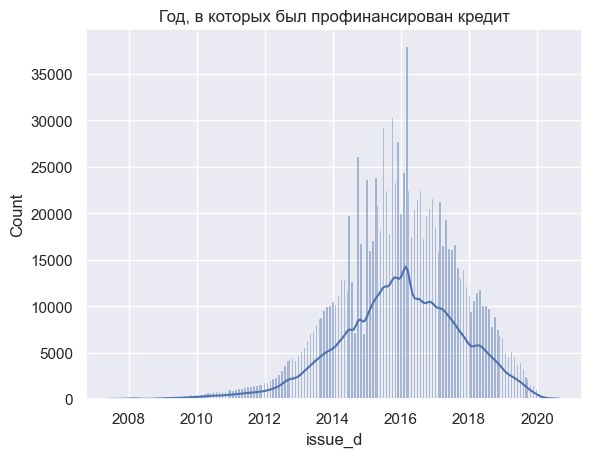

In [11]:
# Посмотрим график годов
sns.set(style="darkgrid")
sns.histplot(data=df, x='issue_d', kde=True)
plt.title('Год, в которых был профинансирован кредит')
plt.show;

# Посмотрим самую первую дату рефенансирования кредита
print('Самая ранняя дата:', df['issue_d'].min())

# Посмотрим самую последюю дату рефенансирвоания кредита
print('Самая последняя дата:', df['issue_d'].max())

Неверно. Последний займ выдан в сентябре 2020 года, а не в августе.

In [12]:
# Определение 90-го процентиля
threshold = df['annual_inc'].quantile(0.9)

# Выборка богатых
richest = df[df['annual_inc'] >= threshold]

# Выборка остальных
not_richest = df[df['annual_inc'] < threshold]

print('Loan_status для 10% самых богатых:')
display(richest['loan_status'].value_counts(normalize=True) * 100)

print('Loan_status для всех осталных:') 
display(not_richest['loan_status'].value_counts(normalize=True) * 100)

Loan_status для 10% самых богатых:


0    84.830756
1    15.169244
Name: loan_status, dtype: float64

Loan_status для всех осталных:


0    80.229037
1    19.770963
Name: loan_status, dtype: float64

Неверно. Дефолт для 10% самых богатых ниже, чем у остальных

Вывод по заданию 2:
- Верно. В тестовой выборке в 3 раза больше займов выданных на 3 года, чем на 5 лет
- Неверно. Медианная процентная ставка в трейне (X_train.csv) 12.69%
- Неверно. Последний займ выдан в сентябре 2020 года, а не в августе.
- Неверно. Дефолт для 10% самых богатых ниже (15%), чем у остальных (19%)

3) Для дефолтных займов в train, в сравнении с недефолтными, отметьте правильные ответы (используйте t-тест, если необходимо):
- Доля проблемных счетов (т.е. acc_now_delinq>0) примерно одна и та же (для дефолтных и недефолтных займов)
- Нижний порог от бюро кредитных историй (fico_range_low) не существенно отличается для плохих и хороших
- Плохие и хорошие не отличаются по разнице между средней запрошенной и одобренной суммой
- Доли пропущенных значений в mths_since_recent_bc_dlq для плохих и хороших отличаются значимо

In [13]:
# Функция для опредления стат значимости
def significance_level(p_value, alpha=0.05):
    if p_value.pvalue < alpha:
        print("Различия статистически значимы")
    else:
        print("Различия не являются статистически значимыми")

In [14]:
# Разделение данных на дефолтные и недефолтные займы
bad_loans = df[df['loan_status'] == 1]
good_loans = df[df['loan_status'] == 0]

Сформулируем гипотезы на вопрос: Доля проблемных счетов (т.е. acc_now_delinq>0) примерно одна и та же (для дефолтных и недефолтных займов)

- Нулевая гипотеза (H0): Доля проблемных счетов для дефолтных и недефолтных займов одинакова.

- Альтернативная гипотеза (H1): Доля проблемных счетов для дефолтных и недефолтных займов различается.

In [15]:
# Применение t-теста
p_value = st.ttest_ind(bad_loans['acc_now_delinq'], good_loans['acc_now_delinq'])

# Вывод результатов
print("Доля проблемных счетов в дефолтных займах:", bad_loans['acc_now_delinq'].mean())
print("Доля проблемных счетов в недефолтных займах:", good_loans['acc_now_delinq'].mean())
print("p-значение:", p_value.pvalue)

# Проверка на статистическую значимость
significance_level(p_value)

Доля проблемных счетов в дефолтных займах: 0.004814168767918206
Доля проблемных счетов в недефолтных займах: 0.00458041441647999
p-значение: 0.16533498885504713
Различия не являются статистически значимыми


Верна нулевая гипотеза. Доля проблемных счетов (т.е. acc_now_delinq>0) примерно одна и та же.

Сформулируем гипотезы на вопрос: Нижний порог от бюро кредитных историй (fico_range_low) не существенно отличается для плохих и хороших.

- Нулевая гипотеза (H0): Средний нижний порог от бюро кредитных историй (fico_range_low) для плохих и хороших займов одинаков.

- Альтернативная гипотеза (H1): Средний нижний порог от бюро кредитных историй (fico_range_low) для плохих и хороших займов отличается.

In [16]:
# Применение t-теста
p_value = st.ttest_ind(bad_loans['fico_range_low'], good_loans['fico_range_low'], equal_var=False)

# Вывод результатов
print('Средний нижний порог для плохих займов:', bad_loans['fico_range_low'].mean())
print('Средний нижний порог для хороших займов:', good_loans['fico_range_low'].mean())
print('p-значение:', p_value.pvalue)

# Проверка на статистическую значимость
significance_level(p_value)

Средний нижний порог для плохих займов: 689.0526881627578
Средний нижний порог для хороших займов: 699.1490189031173
p-значение: 0.0
Различия статистически значимы


Неверно. Нижний порог от бюро кредитных историй (fico_range_low) существенно отличается для плохих и хороших

Сформулируем гипозеты для вопрос: Плохие и хорошие не отличаются по разнице между средней запрошенной и одобренной суммой.

- Нулевая гипотеза (H0): Средняя разница между запрошенной и одобренной суммой для плохих и хороших займов одинакова.

- Альтернативная гипотеза (H1): Средняя разница между запрошенной и одобренной суммой для плохих и хороших займов отличается.

In [17]:
# Рассчет разницы между средней суммой займа и средней суммой финансирования для случаев с плохим статусом займа
diff_bad_loans = df[df['loan_status'] == 1]['loan_amnt'].mean() - df[df['loan_status'] == 1]['funded_amnt'].mean()

# Рассчет разницы между средней суммой займа и средней суммой финансирования для случаев с хорошим статусом займа
diff_good_loans = df[df['loan_status'] == 0]['loan_amnt'].mean() - df[df['loan_status'] == 0]['funded_amnt'].mean()

# Применение t-теста для сравнения разницы в суммах между случаями с разным статусом займа
p_value = st.ttest_ind(df[df['loan_status'] == 1]['loan_amnt'] - df[df['loan_status'] == 1]['funded_amnt'],
                       df[df['loan_status'] == 0]['loan_amnt'] - df[df['loan_status'] == 0]['funded_amnt'], 
                       equal_var=False)

# Вывод разницы для плохих и хороших займов
print('Разница для плохих займов:', diff_bad_loans)
print('Разница для хороших займов:', diff_good_loans)

# Вывод p-значения для t-теста
print(f"p-значение: {p_value.pvalue:.5f}")

# Проверяем статистическую значимость
significance_level(p_value)

Разница для плохих займов: 6.230678560325032
Разница для хороших займов: 6.250793955712652
p-значение: 0.96863
Различия не являются статистически значимыми


Верна нулевая гипотеза. Плохие и хорошие не отличаются по разнице между средней запрошенной и одобренной суммой.

Сформулируем гипотезы для вопроса: Доли пропущенных значений в mths_since_recent_bc_dlq для плохих и хороших отличаются значимо.

- Нулевая гипотеза (H0): Доли пропущенных значений в столбце mths_since_recent_bc_dlq для плохих и хороших займов не отличаются (то есть разница между долями равна 0).

- Альтернативная гипотеза (H1): Доли пропущенных значений в столбце mths_since_recent_bc_dlq для плохих и хороших займов отличаются (то есть разница между долями не равна 0).

In [18]:
# Создание кросс-таблицы для сравнения пропорций
cross_table = pd.crosstab(df['loan_status'], df['mths_since_recent_bc_dlq'].isnull())

# Применение теста хи-квадрат
chi2_stat, p_value, dof, expected = st.chi2_contingency(cross_table)

# Уровень значимости (alpha)
alpha = 0.05

# Вывод результатов
if p_value < alpha:
    print("Различия в долях пропущенных значений статистически значимы")
else:
    print("Различия в долях пропущенных значений не статистически значимы")

Различия в долях пропущенных значений статистически значимы


Верно. Доли пропущенных значений в mths_since_recent_bc_dlq для плохих и хороших отличаются значительно. 

4) Отметьте правильные утверждения:
- Нужно проводить верификацию дохода (см. значения verification_status), т.к. это влияет на вероятность дефолта
- Тем, у кого провели верификацию дохода, доход больше
- Тем, у кого провели верификацию дохода, дефолт меньше
- Верификация дохода и (loan_amnt - funded_amnt) имеют значительную (>0.5) положительную корреляцию

In [19]:
# Создание поднабора данных с верифицированными источниками или подтвержденным статусом проверки
verified = df[(df['verification_status'] == 'Verified') | (df['verification_status'] == 'Source Verified')]

# Создание поднабора данных с не верифицированными источниками
not_verified = df[df['verification_status'] == 'Not Verified']

In [20]:
# Вычисление доли дефолтов в группе с верифицированным доходом
default_rate_verified = verified['loan_status'].mean()

# Вычисление доли дефолтов в группе с не верифицированным доходом
default_rate_not_verified = not_verified['loan_status'].mean()

# Вывод результатов
print(f"Доля дефолтов в группе с верифицированным доходом: {default_rate_verified:.2%}")
print(f"Доля дефолтов в группе с не верифицированным доходом: {default_rate_not_verified:.2%}")

Доля дефолтов в группе с верифицированным доходом: 21.32%
Доля дефолтов в группе с не верифицированным доходом: 14.91%


Верно. Нужно проводить верификацию дохода, т.к. это влияет на вероятность дефолта.

Ответим на вопрос: Тем, у кого провели верификацию дохода, доход больше

In [21]:

# Извлечение столбца 'annual_inc' (годовой доход) из поднаборов данных для верифицированных и не верифицированных случаев
verified_inc = verified['annual_inc']
not_verified_inc = not_verified['annual_inc']

# Вывод среднего значения годового дохода для верифицированных случаев
print('Верифицированный доход:', verified_inc.mean())

# Вывод среднего значения годового дохода для не верифицированных случаев
print('Не верифицированный доход:', not_verified_inc.mean())

Верифицированный доход: 80831.83148947159
Не верифицированный доход: 72173.8650360748


Верно. Тем, у кого проверил верификацию дохода, доход больше.

Ответим на вопрос: Верификация дохода и (loan_amnt - funded_amnt) имеют значительную (>0.5) положительную корреляцию

In [22]:
# Вычисление корреляции между верифицированным доходом и разницей между loan_amnt и funded_amnt
corr = verified['annual_inc'].corr(df['loan_amnt'] - df['funded_amnt'])

# Порог для значительной корреляции
significant_corr_threshold = 0.5

# Вывод значения корреляции
print(f"Корреляция между верифицированным доходом и (loan_amnt - funded_amnt): {corr}")

# Вывод результатов
if abs(corr) > significant_corr_threshold:
    print("Верифицированный доход и (loan_amnt - funded_amnt) имеют значительную положительную корреляцию")
else:
    print("Верифицированный доход и (loan_amnt - funded_amnt) не имеют значительной положительной корреляции")

Корреляция между верифицированным доходом и (loan_amnt - funded_amnt): 0.002024728173051234
Верифицированный доход и (loan_amnt - funded_amnt) не имеют значительной положительной корреляции


Неверно. Верификация дохода и (loan_amnt - funded_amnt) не имеют значительную (>0.5) положительную корреляцию

5) На сколько уменьшится доля дефолта, если выдавать только тем, у кого есть хоть одна ипотека (mort_acc > 0) и приемлемое отношение долгов к доходу (dti < 0.3). Какие ответы правильные?

In [23]:
# Вычисление доли дефолта в исходной выборке
default_rate_original = (df['loan_status'] == 1).mean()

# Создание подвыборки по условиям
subset = df[(df['mort_acc'] > 0) & (df['dti'] < 0.3)]

# Вычисление доли дефолта в подвыборке
default_rate_subset = (subset['loan_status'] == 1).mean()

# Вычисление разницы долей дефолта
reduction_in_default_rate = default_rate_original - default_rate_subset

# Вывод результатов
print(f"Исходная доля дефолта: {default_rate_original:.2%}")
print(f"Доля дефолта с условиями: {default_rate_subset:.2%}")
print(f"Уменьшение доли дефолта: {reduction_in_default_rate:.2%}")

Исходная доля дефолта: 19.30%
Доля дефолта с условиями: 14.39%
Уменьшение доли дефолта: 4.91%


Самая ранняя дата: 1933-03-01 00:00:00
Самая последняя дата: 2017-02-01 00:00:00


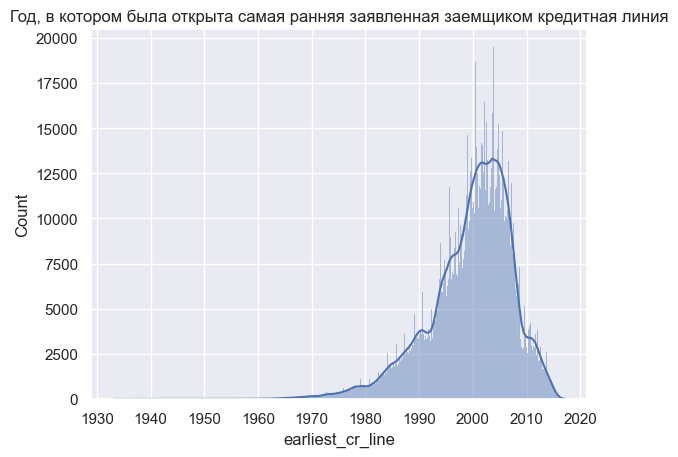

In [24]:
# Посмотрим график годов
sns.histplot(data=df, x='earliest_cr_line', kde=True)
plt.title('Год, в котором была открыта самая ранняя заявленная заемщиком кредитная линия')
plt.show;

# Посмотрим самую первую дату рефенансирования кредита
print('Самая ранняя дата:', df['earliest_cr_line'].min())

# Посмотрим самую последюю дату рефенансирвоания кредита
print('Самая последняя дата:', df['earliest_cr_line'].max())

In [25]:
def plot_box_hist(data, column, title):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
    sns.boxplot(data[column], ax=ax_box)
    sns.histplot(data=data, x=column, kde=True, ax=ax_hist)
    ax_box.set(xlabel=title)
    plt.show()

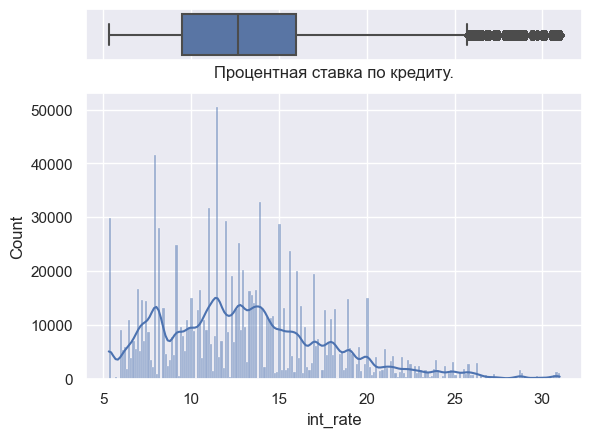

In [26]:
plot_box_hist(df, 'int_rate', 'Процентная ставка по кредиту.')

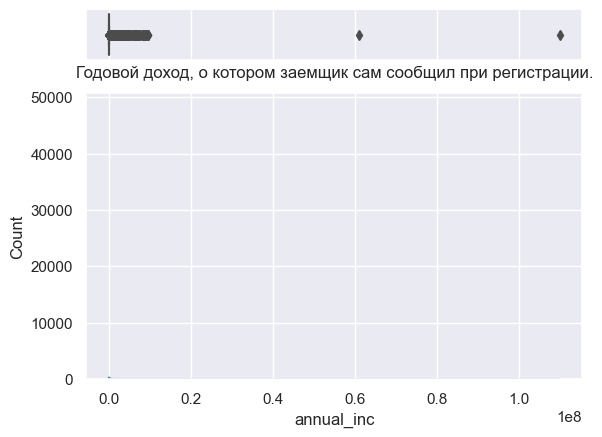

In [27]:
plot_box_hist(df, 'annual_inc', 'Годовой доход, о котором заемщик сам сообщил при регистрации.')

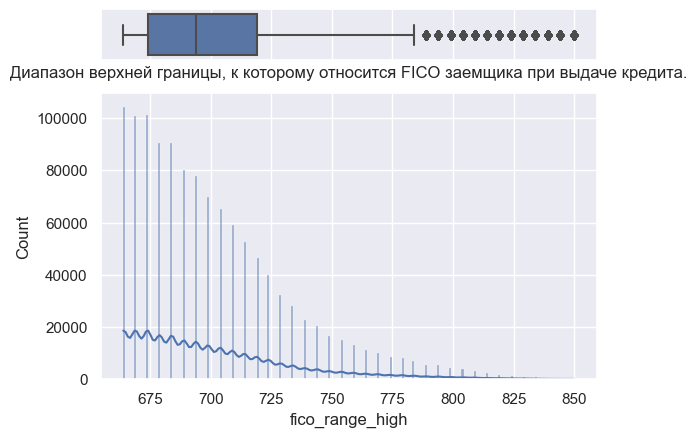

In [28]:
plot_box_hist(df, 'fico_range_high', 'Диапазон верхней границы, к которому относится FICO заемщика при выдаче кредита.')

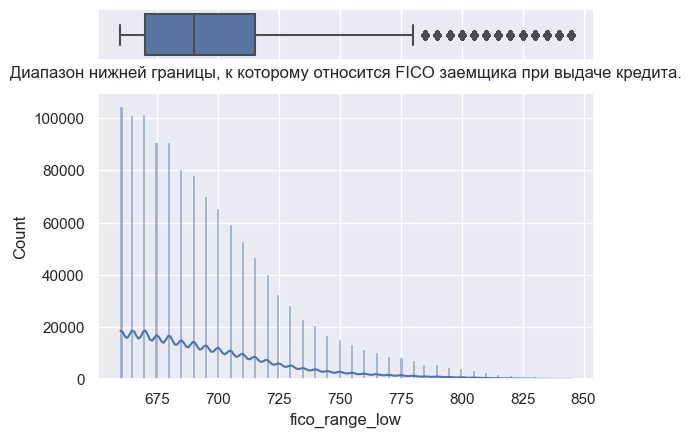

In [29]:
plot_box_hist(df, 'fico_range_low', 'Диапазон нижней границы, к которому относится FICO заемщика при выдаче кредита.')

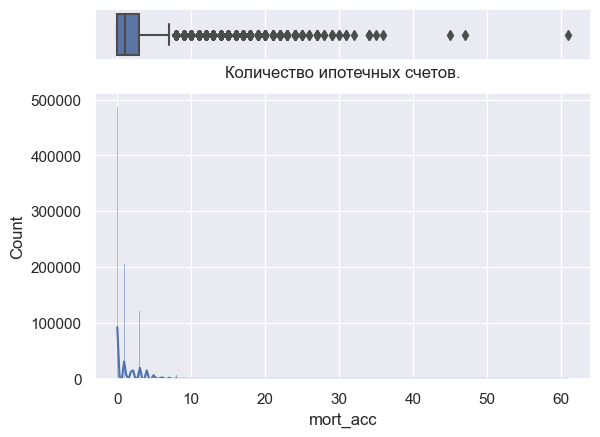

In [30]:
plot_box_hist(df, 'mort_acc', 'Количество ипотечных счетов.')

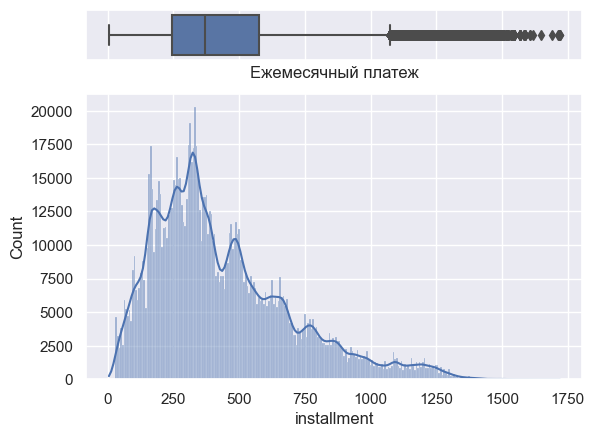

In [31]:
plot_box_hist(df, 'installment', 'Ежемесячный платеж')

### Анализ пропусков

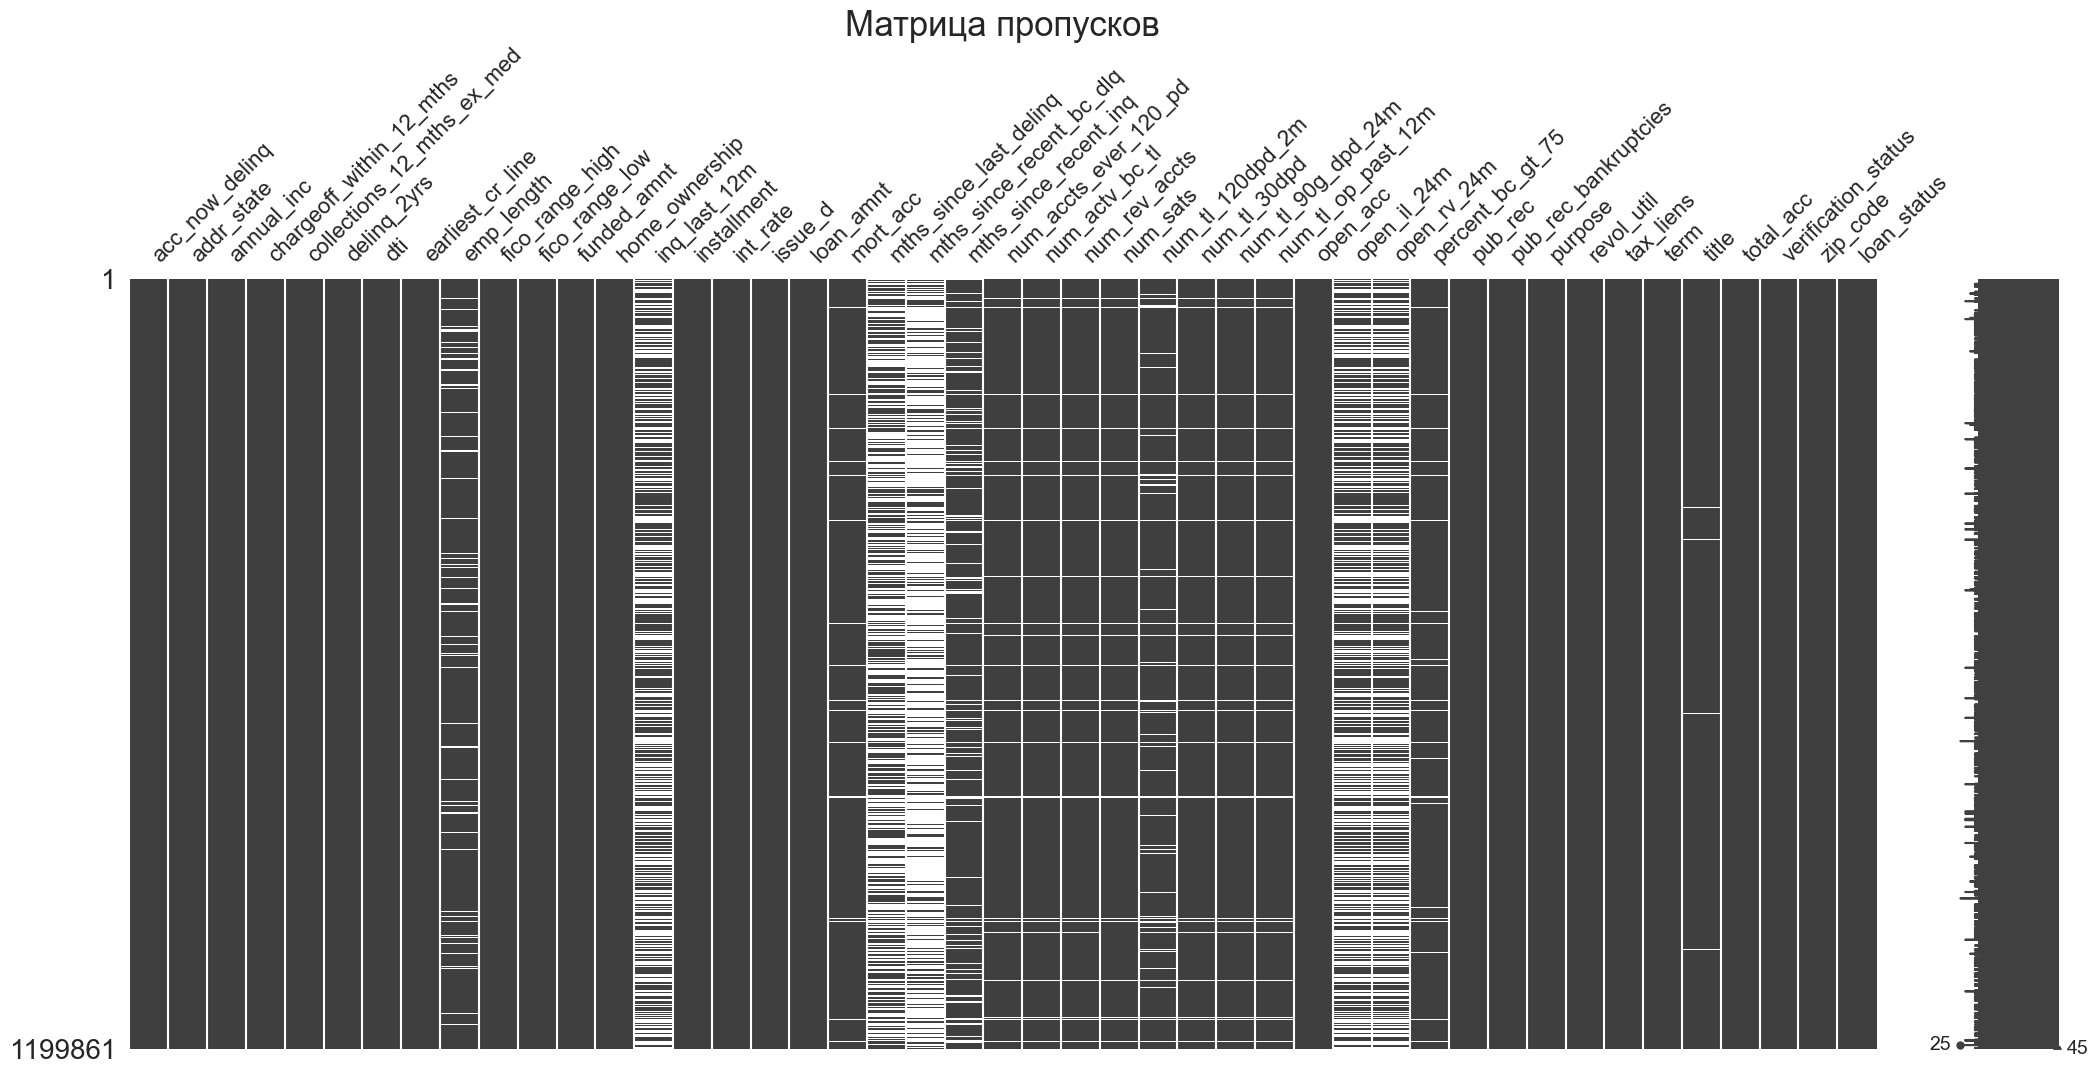

In [32]:
msno.matrix(df)
plt.title('Матрица пропусков', fontsize=25);

### Анализ баланса классов

In [33]:
df['loan_status'].unique()

array([1, 0], dtype=int64)

Построим график, что бы посмотреть распределение классов

Text(0, 0.5, 'Кол-во')

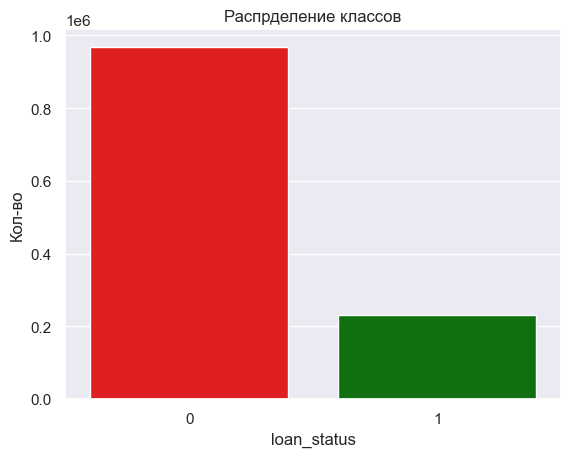

In [34]:
sns.countplot(data=df, x='loan_status', palette=['red', 'green'])
plt.title('Распрделение классов')
plt.ylabel('Кол-во')

In [35]:
df['loan_status'].value_counts(normalize=True).rename({0: 'Вернул займ', 1: 'Не вернул займ'}) * 100

Вернул займ       80.697097
Не вернул займ    19.302903
Name: loan_status, dtype: float64

В целевом признаке присуствует дисбаланс классов. При обучении алгоритма машинного обучения это следует учесть

### Уменьшим кол-во категорий в признаков

В признаках `purpose` и `title` много категорий, это может привести к чрезмерной размерности при кодировании. Переместим редкие категории в `other`

In [36]:
def cat_minimazer(data):
    purpose_counts = data['purpose'].value_counts()
    data.loc[data['purpose'].isin(purpose_counts[purpose_counts < purpose_counts['other']].index), 'purpose'] = 'other'
    
    title_counts = data['title'].value_counts()
    data.loc[data['title'].isin(title_counts[title_counts < title_counts['Other']].index), 'title'] = 'Other'
    

In [37]:
cat_minimazer(df)
cat_minimazer(df_test)

### Создадим новые признаки

Новые признаки:
- `loan_income_ratio` - соотношение суммы кредита к годовому доходу
- `account_age` - срок жизни аккаунта

In [38]:
def new_features(data):
    data['loan_income_ratio'] = data['funded_amnt'] / data['annual_inc']
    
    last_date = data['earliest_cr_line'].max()

    data['account_age'] = (last_date - data['earliest_cr_line']).dt.days / 365

In [39]:
new_features(df)
new_features(df_test)

## Предобработка данных

In [40]:
# Создадим копию датасета
df_ml = df.copy()

Список столбцов к удаленияю:

- `num_tl_120dpd_2m` - 99.9% всех значений это "0". 
- `num_tl_30dpd` - 99.9% всех значений это "0".
- `acc_now_delinq` - 99.9% всех значений это "0".
- `chargeoff_within_12_mths` - 99.9% всех значений это "0".
- `collections_12_mths_ex_med` - 99.9% всех значений это "0".
- `tax_liens` - 97% всех значений это "0".

- `mths_since_recent_bc_dlq`
- `mths_since_last_delinq`
- `open_il_24m`
- `inq_last_12m`
- `delinq_2yrs`
- `pub_rec`
- `pub_rec_bankruptcies`
- `num_tl_90g_dpd_24m`
- `num_accts_ever_120_pd`

In [41]:
# Список столбцов для удаления из датасета
#del_list = ['inq_last_12m', 'mths_since_last_delinq', 'mths_since_recent_bc_dlq', 'open_il_24m', 'open_rv_24m', 
#                  'num_tl_120dpd_2m', 'zip_code', 'num_tl_30dpd']

del_list = ['num_tl_120dpd_2m', 'num_tl_30dpd', 'acc_now_delinq', 'chargeoff_within_12_mths', 
            'collections_12_mths_ex_med', 'tax_liens', 'mths_since_recent_bc_dlq', 'mths_since_last_delinq', 'open_il_24m',
            'inq_last_12m', 'delinq_2yrs', 'pub_rec', 'pub_rec_bankruptcies', 'num_tl_90g_dpd_24m', 'num_accts_ever_120_pd']  

# Удалим столбцы
df_ml.drop(columns=del_list, inplace=True)

# Удалим столбцы для тестовой выборки
df_test.drop(columns=del_list, inplace=True)

In [42]:
# Зафиксируем Random_state
STATE = 12345

### Разделение на выборки

Разделим датасет на обучающую и тестовую выборку

In [43]:
train, test = train_test_split(df_ml, test_size=0.25, random_state=STATE)

In [44]:
print('Размер обучающей выборки:', train.shape)
print('Размер тестовой выборки:', test.shape)

Размер обучающей выборки: (899895, 32)
Размер тестовой выборки: (299966, 32)


### Удалим выбросы

Удалим выбросы из обучающей выборки.

In [45]:
def remove_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.75 * iqr)
    upper_bound = q3 + (1.75 * iqr)
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [46]:
# Признаки с выбрасами
col_with_outliers = ['int_rate', 'annual_inc', 'fico_range_high', 'mort_acc', 'installment']

# Вызовем функцию для очитски от выбросов
train[col_with_outliers] = remove_outliers(train[col_with_outliers])

### Обработка пропусков

In [47]:
train['open_rv_24m'].fillna(0, inplace=True)
test['open_rv_24m'].fillna(0, inplace=True)
df_test['open_rv_24m'].fillna(0, inplace=True)

Заполним признаки `emp_length` и `title` модой

In [48]:
# Заполним пропуски модой
imputer_mode = SimpleImputer(strategy='most_frequent')

# Список столбцов для заполнения
nan_fill_list = ['emp_length', 'title']

# Заполним пропуски в emp_length модой на обучающей и тестовой выборке
train[nan_fill_list] = imputer_mode.fit_transform(train[nan_fill_list])
test[nan_fill_list] = imputer_mode.transform(test[nan_fill_list])
df_test[nan_fill_list] = imputer_mode.transform(df_test[nan_fill_list])

Заполним признаки `mort_acc`, `mths_since_recent_inq` медианными значениями

In [49]:
# Создадим импутер с заполнением медианой
imputer_median = SimpleImputer(strategy='median')

# Список столбцов для заполнения
nan_fill_list = ['mort_acc', 'annual_inc', 'fico_range_high', 'int_rate', 'installment', 'mths_since_recent_inq', 
                 'num_actv_bc_tl', 'num_rev_accts', 'num_sats',
                 'num_tl_op_past_12m', 'percent_bc_gt_75', 'revol_util']

# Заполним пропуски медианой на обучающей и тестовой выборке
train[nan_fill_list] = imputer_median.fit_transform(train[nan_fill_list])
test[nan_fill_list] = imputer_median.transform(test[nan_fill_list])
df_test[nan_fill_list] = imputer_median.transform(df_test[nan_fill_list])

### Выделим признаки и целевой признак

In [50]:
# Обучающая выборка
train_features = train.drop(['loan_status'], axis=1)
train_target = train['loan_status']

# Тестовая выборка
test_features = test.drop(['loan_status'], axis=1)
test_target = test['loan_status']

## Обучение модели

### Создаём Pipeline

In [51]:
# Список категориальных признаков
cat_features = train_features.select_dtypes('object').columns.tolist()

# Список признаков с типом int и float
numeric_features = train_features.select_dtypes(['int', 'float']).columns.tolist()

In [52]:
# Содаём конвейер для предобработки признаков
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_features),
    ('num', StandardScaler(), numeric_features)
])

In [53]:
# Создаём конвейер для гридиентого бустинга CatBoost
pipeline_cb = Pipeline([
    ('classifier', CatBoostClassifier(random_state=STATE, auto_class_weights='Balanced', cat_features=cat_features))
])

In [54]:
# Задаём сетку параметров для градиентого бустинга
param_cb = {
    'classifier__max_depth': [6],
    'classifier__learning_rate': [0.01],
    'classifier__iterations': [1000]
}

In [55]:
# Поиск по сетке для градиентного бустинга CatBoost
CB = GridSearchCV(pipeline_cb, param_cb, cv=5, scoring='roc_auc')

### Обучение моделей

In [56]:
%%time
# Обучаем градиентный бустинг catboost
CB.fit(train_features, train_target)

0:	learn: 0.6919583	total: 556ms	remaining: 9m 15s
1:	learn: 0.6907765	total: 1.01s	remaining: 8m 23s
2:	learn: 0.6896297	total: 1.5s	remaining: 8m 17s
3:	learn: 0.6884726	total: 1.99s	remaining: 8m 14s
4:	learn: 0.6873796	total: 2.48s	remaining: 8m 12s
5:	learn: 0.6863072	total: 3.06s	remaining: 8m 26s
6:	learn: 0.6852503	total: 3.54s	remaining: 8m 21s
7:	learn: 0.6841795	total: 3.98s	remaining: 8m 13s
8:	learn: 0.6831366	total: 4.47s	remaining: 8m 12s
9:	learn: 0.6821163	total: 4.88s	remaining: 8m 3s
10:	learn: 0.6811152	total: 5.28s	remaining: 7m 55s
11:	learn: 0.6801413	total: 5.71s	remaining: 7m 50s
12:	learn: 0.6791994	total: 6.15s	remaining: 7m 47s
13:	learn: 0.6783245	total: 6.6s	remaining: 7m 44s
14:	learn: 0.6774082	total: 7s	remaining: 7m 39s
15:	learn: 0.6765215	total: 7.48s	remaining: 7m 40s
16:	learn: 0.6756427	total: 7.87s	remaining: 7m 35s
17:	learn: 0.6747773	total: 8.21s	remaining: 7m 27s
18:	learn: 0.6739260	total: 8.65s	remaining: 7m 26s
19:	learn: 0.6730898	total: 

159:	learn: 0.6294445	total: 1m 7s	remaining: 5m 56s
160:	learn: 0.6293442	total: 1m 8s	remaining: 5m 56s
161:	learn: 0.6292347	total: 1m 8s	remaining: 5m 56s
162:	learn: 0.6291361	total: 1m 9s	remaining: 5m 56s
163:	learn: 0.6290369	total: 1m 9s	remaining: 5m 56s
164:	learn: 0.6289374	total: 1m 10s	remaining: 5m 55s
165:	learn: 0.6288369	total: 1m 10s	remaining: 5m 55s
166:	learn: 0.6287416	total: 1m 11s	remaining: 5m 55s
167:	learn: 0.6286499	total: 1m 11s	remaining: 5m 54s
168:	learn: 0.6285615	total: 1m 11s	remaining: 5m 53s
169:	learn: 0.6284759	total: 1m 12s	remaining: 5m 53s
170:	learn: 0.6283868	total: 1m 12s	remaining: 5m 53s
171:	learn: 0.6282915	total: 1m 13s	remaining: 5m 53s
172:	learn: 0.6282053	total: 1m 13s	remaining: 5m 52s
173:	learn: 0.6281189	total: 1m 14s	remaining: 5m 52s
174:	learn: 0.6280345	total: 1m 14s	remaining: 5m 52s
175:	learn: 0.6279378	total: 1m 15s	remaining: 5m 51s
176:	learn: 0.6278609	total: 1m 15s	remaining: 5m 51s
177:	learn: 0.6277855	total: 1m 1

312:	learn: 0.6209782	total: 2m 13s	remaining: 4m 53s
313:	learn: 0.6209468	total: 2m 14s	remaining: 4m 53s
314:	learn: 0.6209159	total: 2m 14s	remaining: 4m 52s
315:	learn: 0.6208833	total: 2m 15s	remaining: 4m 52s
316:	learn: 0.6208571	total: 2m 15s	remaining: 4m 51s
317:	learn: 0.6208261	total: 2m 15s	remaining: 4m 51s
318:	learn: 0.6207909	total: 2m 16s	remaining: 4m 51s
319:	learn: 0.6207597	total: 2m 16s	remaining: 4m 50s
320:	learn: 0.6207322	total: 2m 17s	remaining: 4m 50s
321:	learn: 0.6207062	total: 2m 17s	remaining: 4m 49s
322:	learn: 0.6206814	total: 2m 18s	remaining: 4m 49s
323:	learn: 0.6206505	total: 2m 18s	remaining: 4m 49s
324:	learn: 0.6206252	total: 2m 18s	remaining: 4m 48s
325:	learn: 0.6205934	total: 2m 19s	remaining: 4m 48s
326:	learn: 0.6205640	total: 2m 19s	remaining: 4m 47s
327:	learn: 0.6205365	total: 2m 20s	remaining: 4m 47s
328:	learn: 0.6205117	total: 2m 20s	remaining: 4m 47s
329:	learn: 0.6204833	total: 2m 21s	remaining: 4m 46s
330:	learn: 0.6204559	total:

465:	learn: 0.6176226	total: 3m 20s	remaining: 3m 49s
466:	learn: 0.6176051	total: 3m 20s	remaining: 3m 49s
467:	learn: 0.6175887	total: 3m 21s	remaining: 3m 48s
468:	learn: 0.6175748	total: 3m 21s	remaining: 3m 48s
469:	learn: 0.6175578	total: 3m 22s	remaining: 3m 47s
470:	learn: 0.6175434	total: 3m 22s	remaining: 3m 47s
471:	learn: 0.6175288	total: 3m 23s	remaining: 3m 47s
472:	learn: 0.6175145	total: 3m 23s	remaining: 3m 46s
473:	learn: 0.6174995	total: 3m 23s	remaining: 3m 46s
474:	learn: 0.6174841	total: 3m 24s	remaining: 3m 45s
475:	learn: 0.6174640	total: 3m 24s	remaining: 3m 45s
476:	learn: 0.6174506	total: 3m 25s	remaining: 3m 44s
477:	learn: 0.6174350	total: 3m 25s	remaining: 3m 44s
478:	learn: 0.6174181	total: 3m 26s	remaining: 3m 44s
479:	learn: 0.6174042	total: 3m 26s	remaining: 3m 43s
480:	learn: 0.6173886	total: 3m 26s	remaining: 3m 43s
481:	learn: 0.6173726	total: 3m 27s	remaining: 3m 42s
482:	learn: 0.6173569	total: 3m 27s	remaining: 3m 42s
483:	learn: 0.6173410	total:

618:	learn: 0.6156564	total: 4m 26s	remaining: 2m 43s
619:	learn: 0.6156446	total: 4m 26s	remaining: 2m 43s
620:	learn: 0.6156301	total: 4m 26s	remaining: 2m 42s
621:	learn: 0.6156183	total: 4m 27s	remaining: 2m 42s
622:	learn: 0.6156070	total: 4m 27s	remaining: 2m 42s
623:	learn: 0.6155971	total: 4m 28s	remaining: 2m 41s
624:	learn: 0.6155881	total: 4m 28s	remaining: 2m 41s
625:	learn: 0.6155775	total: 4m 29s	remaining: 2m 40s
626:	learn: 0.6155678	total: 4m 29s	remaining: 2m 40s
627:	learn: 0.6155594	total: 4m 30s	remaining: 2m 39s
628:	learn: 0.6155525	total: 4m 30s	remaining: 2m 39s
629:	learn: 0.6155456	total: 4m 30s	remaining: 2m 39s
630:	learn: 0.6155359	total: 4m 31s	remaining: 2m 38s
631:	learn: 0.6155263	total: 4m 31s	remaining: 2m 38s
632:	learn: 0.6155157	total: 4m 32s	remaining: 2m 37s
633:	learn: 0.6155034	total: 4m 32s	remaining: 2m 37s
634:	learn: 0.6154935	total: 4m 33s	remaining: 2m 36s
635:	learn: 0.6154819	total: 4m 33s	remaining: 2m 36s
636:	learn: 0.6154692	total:

771:	learn: 0.6143126	total: 5m 33s	remaining: 1m 38s
772:	learn: 0.6143054	total: 5m 34s	remaining: 1m 38s
773:	learn: 0.6143048	total: 5m 34s	remaining: 1m 37s
774:	learn: 0.6142976	total: 5m 34s	remaining: 1m 37s
775:	learn: 0.6142910	total: 5m 35s	remaining: 1m 36s
776:	learn: 0.6142823	total: 5m 35s	remaining: 1m 36s
777:	learn: 0.6142735	total: 5m 36s	remaining: 1m 35s
778:	learn: 0.6142625	total: 5m 36s	remaining: 1m 35s
779:	learn: 0.6142550	total: 5m 36s	remaining: 1m 35s
780:	learn: 0.6142479	total: 5m 37s	remaining: 1m 34s
781:	learn: 0.6142419	total: 5m 37s	remaining: 1m 34s
782:	learn: 0.6142331	total: 5m 38s	remaining: 1m 33s
783:	learn: 0.6142274	total: 5m 38s	remaining: 1m 33s
784:	learn: 0.6142198	total: 5m 39s	remaining: 1m 32s
785:	learn: 0.6142112	total: 5m 39s	remaining: 1m 32s
786:	learn: 0.6142038	total: 5m 40s	remaining: 1m 32s
787:	learn: 0.6141934	total: 5m 40s	remaining: 1m 31s
788:	learn: 0.6141868	total: 5m 41s	remaining: 1m 31s
789:	learn: 0.6141789	total:

926:	learn: 0.6132632	total: 6m 42s	remaining: 31.7s
927:	learn: 0.6132580	total: 6m 42s	remaining: 31.3s
928:	learn: 0.6132496	total: 6m 43s	remaining: 30.8s
929:	learn: 0.6132425	total: 6m 43s	remaining: 30.4s
930:	learn: 0.6132373	total: 6m 44s	remaining: 29.9s
931:	learn: 0.6132324	total: 6m 44s	remaining: 29.5s
932:	learn: 0.6132241	total: 6m 44s	remaining: 29.1s
933:	learn: 0.6132184	total: 6m 45s	remaining: 28.6s
934:	learn: 0.6132131	total: 6m 45s	remaining: 28.2s
935:	learn: 0.6132085	total: 6m 46s	remaining: 27.8s
936:	learn: 0.6132018	total: 6m 46s	remaining: 27.3s
937:	learn: 0.6131976	total: 6m 47s	remaining: 26.9s
938:	learn: 0.6131882	total: 6m 47s	remaining: 26.5s
939:	learn: 0.6131831	total: 6m 47s	remaining: 26s
940:	learn: 0.6131744	total: 6m 48s	remaining: 25.6s
941:	learn: 0.6131699	total: 6m 48s	remaining: 25.2s
942:	learn: 0.6131639	total: 6m 49s	remaining: 24.7s
943:	learn: 0.6131587	total: 6m 49s	remaining: 24.3s
944:	learn: 0.6131538	total: 6m 49s	remaining: 2

84:	learn: 0.6422440	total: 36.1s	remaining: 6m 28s
85:	learn: 0.6419796	total: 36.5s	remaining: 6m 28s
86:	learn: 0.6417185	total: 36.9s	remaining: 6m 27s
87:	learn: 0.6414658	total: 37.3s	remaining: 6m 26s
88:	learn: 0.6412293	total: 37.8s	remaining: 6m 26s
89:	learn: 0.6409802	total: 38.1s	remaining: 6m 25s
90:	learn: 0.6407417	total: 38.6s	remaining: 6m 25s
91:	learn: 0.6405073	total: 39s	remaining: 6m 24s
92:	learn: 0.6402666	total: 39.4s	remaining: 6m 24s
93:	learn: 0.6400416	total: 39.8s	remaining: 6m 23s
94:	learn: 0.6398097	total: 40.2s	remaining: 6m 23s
95:	learn: 0.6395849	total: 40.7s	remaining: 6m 23s
96:	learn: 0.6393819	total: 41.1s	remaining: 6m 22s
97:	learn: 0.6391645	total: 41.6s	remaining: 6m 22s
98:	learn: 0.6389482	total: 42s	remaining: 6m 22s
99:	learn: 0.6387443	total: 42.5s	remaining: 6m 22s
100:	learn: 0.6385496	total: 42.9s	remaining: 6m 22s
101:	learn: 0.6383480	total: 43.4s	remaining: 6m 21s
102:	learn: 0.6381466	total: 43.9s	remaining: 6m 22s
103:	learn: 0

239:	learn: 0.6243231	total: 1m 40s	remaining: 5m 18s
240:	learn: 0.6242798	total: 1m 41s	remaining: 5m 18s
241:	learn: 0.6242300	total: 1m 41s	remaining: 5m 17s
242:	learn: 0.6241808	total: 1m 41s	remaining: 5m 17s
243:	learn: 0.6241282	total: 1m 42s	remaining: 5m 16s
244:	learn: 0.6240754	total: 1m 42s	remaining: 5m 16s
245:	learn: 0.6240294	total: 1m 42s	remaining: 5m 15s
246:	learn: 0.6239786	total: 1m 43s	remaining: 5m 15s
247:	learn: 0.6239312	total: 1m 43s	remaining: 5m 14s
248:	learn: 0.6238817	total: 1m 44s	remaining: 5m 14s
249:	learn: 0.6238277	total: 1m 44s	remaining: 5m 14s
250:	learn: 0.6237811	total: 1m 45s	remaining: 5m 13s
251:	learn: 0.6237385	total: 1m 45s	remaining: 5m 13s
252:	learn: 0.6236985	total: 1m 45s	remaining: 5m 12s
253:	learn: 0.6236568	total: 1m 46s	remaining: 5m 12s
254:	learn: 0.6236134	total: 1m 46s	remaining: 5m 11s
255:	learn: 0.6235676	total: 1m 47s	remaining: 5m 11s
256:	learn: 0.6235236	total: 1m 47s	remaining: 5m 10s
257:	learn: 0.6234739	total:

392:	learn: 0.6193417	total: 2m 45s	remaining: 4m 16s
393:	learn: 0.6193172	total: 2m 46s	remaining: 4m 15s
394:	learn: 0.6192958	total: 2m 46s	remaining: 4m 15s
395:	learn: 0.6192705	total: 2m 47s	remaining: 4m 14s
396:	learn: 0.6192481	total: 2m 47s	remaining: 4m 14s
397:	learn: 0.6192277	total: 2m 47s	remaining: 4m 14s
398:	learn: 0.6192022	total: 2m 48s	remaining: 4m 13s
399:	learn: 0.6191796	total: 2m 48s	remaining: 4m 13s
400:	learn: 0.6191591	total: 2m 49s	remaining: 4m 12s
401:	learn: 0.6191316	total: 2m 49s	remaining: 4m 12s
402:	learn: 0.6191107	total: 2m 50s	remaining: 4m 11s
403:	learn: 0.6190889	total: 2m 50s	remaining: 4m 11s
404:	learn: 0.6190652	total: 2m 50s	remaining: 4m 11s
405:	learn: 0.6190411	total: 2m 51s	remaining: 4m 10s
406:	learn: 0.6190217	total: 2m 51s	remaining: 4m 10s
407:	learn: 0.6190013	total: 2m 52s	remaining: 4m 10s
408:	learn: 0.6189830	total: 2m 52s	remaining: 4m 9s
409:	learn: 0.6189637	total: 2m 53s	remaining: 4m 9s
410:	learn: 0.6189450	total: 2

545:	learn: 0.6167898	total: 3m 54s	remaining: 3m 14s
546:	learn: 0.6167771	total: 3m 54s	remaining: 3m 14s
547:	learn: 0.6167667	total: 3m 55s	remaining: 3m 13s
548:	learn: 0.6167516	total: 3m 55s	remaining: 3m 13s
549:	learn: 0.6167373	total: 3m 56s	remaining: 3m 13s
550:	learn: 0.6167245	total: 3m 56s	remaining: 3m 12s
551:	learn: 0.6167123	total: 3m 56s	remaining: 3m 12s
552:	learn: 0.6166981	total: 3m 57s	remaining: 3m 11s
553:	learn: 0.6166890	total: 3m 57s	remaining: 3m 11s
554:	learn: 0.6166775	total: 3m 58s	remaining: 3m 11s
555:	learn: 0.6166653	total: 3m 58s	remaining: 3m 10s
556:	learn: 0.6166549	total: 3m 59s	remaining: 3m 10s
557:	learn: 0.6166418	total: 3m 59s	remaining: 3m 9s
558:	learn: 0.6166281	total: 4m	remaining: 3m 9s
559:	learn: 0.6166196	total: 4m	remaining: 3m 8s
560:	learn: 0.6166030	total: 4m	remaining: 3m 8s
561:	learn: 0.6165905	total: 4m 1s	remaining: 3m 8s
562:	learn: 0.6165783	total: 4m 1s	remaining: 3m 7s
563:	learn: 0.6165676	total: 4m 2s	remaining: 3m

699:	learn: 0.6151395	total: 5m 2s	remaining: 2m 9s
700:	learn: 0.6151321	total: 5m 3s	remaining: 2m 9s
701:	learn: 0.6151244	total: 5m 3s	remaining: 2m 8s
702:	learn: 0.6151166	total: 5m 4s	remaining: 2m 8s
703:	learn: 0.6151149	total: 5m 4s	remaining: 2m 7s
704:	learn: 0.6151046	total: 5m 4s	remaining: 2m 7s
705:	learn: 0.6150943	total: 5m 5s	remaining: 2m 7s
706:	learn: 0.6150854	total: 5m 5s	remaining: 2m 6s
707:	learn: 0.6150772	total: 5m 6s	remaining: 2m 6s
708:	learn: 0.6150691	total: 5m 6s	remaining: 2m 5s
709:	learn: 0.6150624	total: 5m 7s	remaining: 2m 5s
710:	learn: 0.6150541	total: 5m 7s	remaining: 2m 4s
711:	learn: 0.6150430	total: 5m 7s	remaining: 2m 4s
712:	learn: 0.6150337	total: 5m 8s	remaining: 2m 4s
713:	learn: 0.6150252	total: 5m 8s	remaining: 2m 3s
714:	learn: 0.6150174	total: 5m 9s	remaining: 2m 3s
715:	learn: 0.6150074	total: 5m 9s	remaining: 2m 2s
716:	learn: 0.6149984	total: 5m 10s	remaining: 2m 2s
717:	learn: 0.6149934	total: 5m 10s	remaining: 2m 2s
718:	learn

853:	learn: 0.6139800	total: 6m 12s	remaining: 1m 3s
854:	learn: 0.6139720	total: 6m 13s	remaining: 1m 3s
855:	learn: 0.6139643	total: 6m 13s	remaining: 1m 2s
856:	learn: 0.6139568	total: 6m 14s	remaining: 1m 2s
857:	learn: 0.6139516	total: 6m 14s	remaining: 1m 1s
858:	learn: 0.6139442	total: 6m 14s	remaining: 1m 1s
859:	learn: 0.6139389	total: 6m 15s	remaining: 1m 1s
860:	learn: 0.6139326	total: 6m 15s	remaining: 1m
861:	learn: 0.6139251	total: 6m 16s	remaining: 1m
862:	learn: 0.6139171	total: 6m 16s	remaining: 59.8s
863:	learn: 0.6139108	total: 6m 17s	remaining: 59.4s
864:	learn: 0.6139070	total: 6m 17s	remaining: 59s
865:	learn: 0.6138987	total: 6m 18s	remaining: 58.6s
866:	learn: 0.6138972	total: 6m 18s	remaining: 58.1s
867:	learn: 0.6138920	total: 6m 19s	remaining: 57.6s
868:	learn: 0.6138864	total: 6m 19s	remaining: 57.2s
869:	learn: 0.6138796	total: 6m 20s	remaining: 56.8s
870:	learn: 0.6138740	total: 6m 20s	remaining: 56.4s
871:	learn: 0.6138672	total: 6m 21s	remaining: 55.9s
8

10:	learn: 0.6811640	total: 4.66s	remaining: 6m 59s
11:	learn: 0.6802054	total: 5.07s	remaining: 6m 57s
12:	learn: 0.6792429	total: 5.43s	remaining: 6m 52s
13:	learn: 0.6783000	total: 5.85s	remaining: 6m 51s
14:	learn: 0.6773976	total: 6.25s	remaining: 6m 50s
15:	learn: 0.6764894	total: 6.7s	remaining: 6m 52s
16:	learn: 0.6756151	total: 7.13s	remaining: 6m 52s
17:	learn: 0.6747694	total: 7.52s	remaining: 6m 50s
18:	learn: 0.6739687	total: 7.94s	remaining: 6m 50s
19:	learn: 0.6731634	total: 8.32s	remaining: 6m 47s
20:	learn: 0.6723568	total: 8.79s	remaining: 6m 49s
21:	learn: 0.6715551	total: 9.24s	remaining: 6m 50s
22:	learn: 0.6707652	total: 9.64s	remaining: 6m 49s
23:	learn: 0.6700202	total: 10s	remaining: 6m 46s
24:	learn: 0.6692936	total: 10.4s	remaining: 6m 45s
25:	learn: 0.6685809	total: 10.8s	remaining: 6m 45s
26:	learn: 0.6678480	total: 11.3s	remaining: 6m 46s
27:	learn: 0.6671325	total: 11.7s	remaining: 6m 45s
28:	learn: 0.6664544	total: 12.1s	remaining: 6m 44s
29:	learn: 0.66

168:	learn: 0.6289291	total: 1m 12s	remaining: 5m 54s
169:	learn: 0.6288374	total: 1m 12s	remaining: 5m 54s
170:	learn: 0.6287543	total: 1m 13s	remaining: 5m 54s
171:	learn: 0.6286699	total: 1m 13s	remaining: 5m 53s
172:	learn: 0.6285823	total: 1m 13s	remaining: 5m 53s
173:	learn: 0.6284937	total: 1m 14s	remaining: 5m 52s
174:	learn: 0.6284032	total: 1m 14s	remaining: 5m 52s
175:	learn: 0.6283202	total: 1m 15s	remaining: 5m 51s
176:	learn: 0.6282408	total: 1m 15s	remaining: 5m 51s
177:	learn: 0.6281598	total: 1m 15s	remaining: 5m 50s
178:	learn: 0.6280844	total: 1m 16s	remaining: 5m 49s
179:	learn: 0.6279998	total: 1m 16s	remaining: 5m 49s
180:	learn: 0.6279235	total: 1m 17s	remaining: 5m 48s
181:	learn: 0.6278442	total: 1m 17s	remaining: 5m 48s
182:	learn: 0.6277715	total: 1m 17s	remaining: 5m 47s
183:	learn: 0.6276968	total: 1m 18s	remaining: 5m 47s
184:	learn: 0.6276082	total: 1m 18s	remaining: 5m 47s
185:	learn: 0.6275369	total: 1m 19s	remaining: 5m 46s
186:	learn: 0.6274611	total:

321:	learn: 0.6210184	total: 2m 17s	remaining: 4m 49s
322:	learn: 0.6209878	total: 2m 17s	remaining: 4m 48s
323:	learn: 0.6209601	total: 2m 18s	remaining: 4m 48s
324:	learn: 0.6209277	total: 2m 18s	remaining: 4m 48s
325:	learn: 0.6208902	total: 2m 19s	remaining: 4m 47s
326:	learn: 0.6208617	total: 2m 19s	remaining: 4m 47s
327:	learn: 0.6208335	total: 2m 19s	remaining: 4m 46s
328:	learn: 0.6208014	total: 2m 20s	remaining: 4m 45s
329:	learn: 0.6207675	total: 2m 20s	remaining: 4m 45s
330:	learn: 0.6207373	total: 2m 21s	remaining: 4m 45s
331:	learn: 0.6207098	total: 2m 21s	remaining: 4m 44s
332:	learn: 0.6206775	total: 2m 21s	remaining: 4m 44s
333:	learn: 0.6206503	total: 2m 22s	remaining: 4m 43s
334:	learn: 0.6206175	total: 2m 22s	remaining: 4m 43s
335:	learn: 0.6205922	total: 2m 23s	remaining: 4m 43s
336:	learn: 0.6205615	total: 2m 23s	remaining: 4m 42s
337:	learn: 0.6205370	total: 2m 24s	remaining: 4m 42s
338:	learn: 0.6205107	total: 2m 24s	remaining: 4m 41s
339:	learn: 0.6204827	total:

474:	learn: 0.6176886	total: 3m 21s	remaining: 3m 42s
475:	learn: 0.6176765	total: 3m 21s	remaining: 3m 41s
476:	learn: 0.6176598	total: 3m 21s	remaining: 3m 41s
477:	learn: 0.6176409	total: 3m 22s	remaining: 3m 40s
478:	learn: 0.6176265	total: 3m 22s	remaining: 3m 40s
479:	learn: 0.6176058	total: 3m 23s	remaining: 3m 40s
480:	learn: 0.6175874	total: 3m 23s	remaining: 3m 39s
481:	learn: 0.6175716	total: 3m 23s	remaining: 3m 39s
482:	learn: 0.6175531	total: 3m 24s	remaining: 3m 38s
483:	learn: 0.6175405	total: 3m 24s	remaining: 3m 38s
484:	learn: 0.6175249	total: 3m 25s	remaining: 3m 37s
485:	learn: 0.6175058	total: 3m 25s	remaining: 3m 37s
486:	learn: 0.6174932	total: 3m 26s	remaining: 3m 37s
487:	learn: 0.6174782	total: 3m 26s	remaining: 3m 36s
488:	learn: 0.6174619	total: 3m 26s	remaining: 3m 36s
489:	learn: 0.6174463	total: 3m 27s	remaining: 3m 35s
490:	learn: 0.6174303	total: 3m 27s	remaining: 3m 35s
491:	learn: 0.6174152	total: 3m 28s	remaining: 3m 34s
492:	learn: 0.6174029	total:

627:	learn: 0.6157511	total: 4m 28s	remaining: 2m 39s
628:	learn: 0.6157411	total: 4m 29s	remaining: 2m 38s
629:	learn: 0.6157318	total: 4m 29s	remaining: 2m 38s
630:	learn: 0.6157226	total: 4m 30s	remaining: 2m 37s
631:	learn: 0.6157126	total: 4m 30s	remaining: 2m 37s
632:	learn: 0.6156988	total: 4m 30s	remaining: 2m 37s
633:	learn: 0.6156854	total: 4m 31s	remaining: 2m 36s
634:	learn: 0.6156743	total: 4m 31s	remaining: 2m 36s
635:	learn: 0.6156621	total: 4m 32s	remaining: 2m 35s
636:	learn: 0.6156518	total: 4m 32s	remaining: 2m 35s
637:	learn: 0.6156395	total: 4m 33s	remaining: 2m 35s
638:	learn: 0.6156285	total: 4m 33s	remaining: 2m 34s
639:	learn: 0.6156174	total: 4m 33s	remaining: 2m 34s
640:	learn: 0.6156044	total: 4m 34s	remaining: 2m 33s
641:	learn: 0.6155959	total: 4m 34s	remaining: 2m 33s
642:	learn: 0.6155834	total: 4m 35s	remaining: 2m 32s
643:	learn: 0.6155733	total: 4m 35s	remaining: 2m 32s
644:	learn: 0.6155660	total: 4m 36s	remaining: 2m 32s
645:	learn: 0.6155534	total:

780:	learn: 0.6144137	total: 5m 36s	remaining: 1m 34s
781:	learn: 0.6144054	total: 5m 37s	remaining: 1m 34s
782:	learn: 0.6143999	total: 5m 37s	remaining: 1m 33s
783:	learn: 0.6143921	total: 5m 38s	remaining: 1m 33s
784:	learn: 0.6143882	total: 5m 38s	remaining: 1m 32s
785:	learn: 0.6143812	total: 5m 39s	remaining: 1m 32s
786:	learn: 0.6143750	total: 5m 39s	remaining: 1m 31s
787:	learn: 0.6143695	total: 5m 40s	remaining: 1m 31s
788:	learn: 0.6143637	total: 5m 40s	remaining: 1m 31s
789:	learn: 0.6143582	total: 5m 40s	remaining: 1m 30s
790:	learn: 0.6143576	total: 5m 41s	remaining: 1m 30s
791:	learn: 0.6143503	total: 5m 41s	remaining: 1m 29s
792:	learn: 0.6143437	total: 5m 41s	remaining: 1m 29s
793:	learn: 0.6143323	total: 5m 42s	remaining: 1m 28s
794:	learn: 0.6143252	total: 5m 42s	remaining: 1m 28s
795:	learn: 0.6143192	total: 5m 43s	remaining: 1m 27s
796:	learn: 0.6143122	total: 5m 43s	remaining: 1m 27s
797:	learn: 0.6143030	total: 5m 44s	remaining: 1m 27s
798:	learn: 0.6142967	total:

935:	learn: 0.6134166	total: 6m 46s	remaining: 27.8s
936:	learn: 0.6134116	total: 6m 46s	remaining: 27.3s
937:	learn: 0.6134060	total: 6m 47s	remaining: 26.9s
938:	learn: 0.6134005	total: 6m 47s	remaining: 26.5s
939:	learn: 0.6133956	total: 6m 47s	remaining: 26s
940:	learn: 0.6133887	total: 6m 48s	remaining: 25.6s
941:	learn: 0.6133819	total: 6m 48s	remaining: 25.2s
942:	learn: 0.6133762	total: 6m 49s	remaining: 24.7s
943:	learn: 0.6133731	total: 6m 49s	remaining: 24.3s
944:	learn: 0.6133679	total: 6m 50s	remaining: 23.9s
945:	learn: 0.6133634	total: 6m 50s	remaining: 23.4s
946:	learn: 0.6133577	total: 6m 50s	remaining: 23s
947:	learn: 0.6133487	total: 6m 51s	remaining: 22.6s
948:	learn: 0.6133423	total: 6m 51s	remaining: 22.1s
949:	learn: 0.6133361	total: 6m 52s	remaining: 21.7s
950:	learn: 0.6133262	total: 6m 52s	remaining: 21.3s
951:	learn: 0.6133210	total: 6m 53s	remaining: 20.8s
952:	learn: 0.6133151	total: 6m 53s	remaining: 20.4s
953:	learn: 0.6133060	total: 6m 54s	remaining: 20s

93:	learn: 0.6393005	total: 39.4s	remaining: 6m 19s
94:	learn: 0.6390753	total: 39.8s	remaining: 6m 19s
95:	learn: 0.6388452	total: 40.2s	remaining: 6m 18s
96:	learn: 0.6386215	total: 40.6s	remaining: 6m 18s
97:	learn: 0.6383963	total: 41.1s	remaining: 6m 18s
98:	learn: 0.6381838	total: 41.6s	remaining: 6m 18s
99:	learn: 0.6379589	total: 42s	remaining: 6m 18s
100:	learn: 0.6377466	total: 42.5s	remaining: 6m 17s
101:	learn: 0.6375400	total: 42.9s	remaining: 6m 17s
102:	learn: 0.6373572	total: 43.3s	remaining: 6m 17s
103:	learn: 0.6371500	total: 43.7s	remaining: 6m 16s
104:	learn: 0.6369413	total: 44.1s	remaining: 6m 16s
105:	learn: 0.6367414	total: 44.6s	remaining: 6m 15s
106:	learn: 0.6365531	total: 45s	remaining: 6m 15s
107:	learn: 0.6363738	total: 45.4s	remaining: 6m 14s
108:	learn: 0.6361790	total: 45.9s	remaining: 6m 14s
109:	learn: 0.6359877	total: 46.3s	remaining: 6m 14s
110:	learn: 0.6358000	total: 46.6s	remaining: 6m 13s
111:	learn: 0.6356154	total: 47.1s	remaining: 6m 13s
112:

248:	learn: 0.6230261	total: 1m 44s	remaining: 5m 16s
249:	learn: 0.6229811	total: 1m 45s	remaining: 5m 16s
250:	learn: 0.6229399	total: 1m 45s	remaining: 5m 16s
251:	learn: 0.6228900	total: 1m 46s	remaining: 5m 15s
252:	learn: 0.6228399	total: 1m 46s	remaining: 5m 15s
253:	learn: 0.6227943	total: 1m 47s	remaining: 5m 14s
254:	learn: 0.6227467	total: 1m 47s	remaining: 5m 14s
255:	learn: 0.6226975	total: 1m 48s	remaining: 5m 14s
256:	learn: 0.6226555	total: 1m 48s	remaining: 5m 13s
257:	learn: 0.6226108	total: 1m 48s	remaining: 5m 13s
258:	learn: 0.6225644	total: 1m 49s	remaining: 5m 13s
259:	learn: 0.6225172	total: 1m 49s	remaining: 5m 12s
260:	learn: 0.6224764	total: 1m 50s	remaining: 5m 12s
261:	learn: 0.6224362	total: 1m 50s	remaining: 5m 11s
262:	learn: 0.6223947	total: 1m 51s	remaining: 5m 11s
263:	learn: 0.6223489	total: 1m 51s	remaining: 5m 11s
264:	learn: 0.6223020	total: 1m 51s	remaining: 5m 10s
265:	learn: 0.6222651	total: 1m 52s	remaining: 5m 10s
266:	learn: 0.6222282	total:

401:	learn: 0.6183289	total: 2m 52s	remaining: 4m 17s
402:	learn: 0.6183062	total: 2m 53s	remaining: 4m 16s
403:	learn: 0.6182887	total: 2m 53s	remaining: 4m 16s
404:	learn: 0.6182673	total: 2m 54s	remaining: 4m 16s
405:	learn: 0.6182482	total: 2m 54s	remaining: 4m 15s
406:	learn: 0.6182260	total: 2m 55s	remaining: 4m 15s
407:	learn: 0.6182072	total: 2m 55s	remaining: 4m 15s
408:	learn: 0.6181861	total: 2m 56s	remaining: 4m 14s
409:	learn: 0.6181626	total: 2m 56s	remaining: 4m 14s
410:	learn: 0.6181445	total: 2m 57s	remaining: 4m 14s
411:	learn: 0.6181223	total: 2m 57s	remaining: 4m 13s
412:	learn: 0.6181026	total: 2m 58s	remaining: 4m 13s
413:	learn: 0.6180807	total: 2m 58s	remaining: 4m 12s
414:	learn: 0.6180594	total: 2m 59s	remaining: 4m 12s
415:	learn: 0.6180398	total: 2m 59s	remaining: 4m 12s
416:	learn: 0.6180206	total: 2m 59s	remaining: 4m 11s
417:	learn: 0.6180021	total: 3m	remaining: 4m 11s
418:	learn: 0.6179817	total: 3m	remaining: 4m 10s
419:	learn: 0.6179624	total: 3m 1s	r

554:	learn: 0.6159233	total: 3m 59s	remaining: 3m 11s
555:	learn: 0.6159093	total: 3m 59s	remaining: 3m 11s
556:	learn: 0.6158990	total: 4m	remaining: 3m 11s
557:	learn: 0.6158889	total: 4m	remaining: 3m 10s
558:	learn: 0.6158753	total: 4m	remaining: 3m 10s
559:	learn: 0.6158660	total: 4m 1s	remaining: 3m 9s
560:	learn: 0.6158574	total: 4m 1s	remaining: 3m 9s
561:	learn: 0.6158467	total: 4m 2s	remaining: 3m 8s
562:	learn: 0.6158398	total: 4m 2s	remaining: 3m 8s
563:	learn: 0.6158296	total: 4m 2s	remaining: 3m 7s
564:	learn: 0.6158176	total: 4m 3s	remaining: 3m 7s
565:	learn: 0.6158002	total: 4m 3s	remaining: 3m 6s
566:	learn: 0.6157910	total: 4m 4s	remaining: 3m 6s
567:	learn: 0.6157806	total: 4m 4s	remaining: 3m 6s
568:	learn: 0.6157709	total: 4m 5s	remaining: 3m 5s
569:	learn: 0.6157595	total: 4m 5s	remaining: 3m 5s
570:	learn: 0.6157462	total: 4m 5s	remaining: 3m 4s
571:	learn: 0.6157349	total: 4m 6s	remaining: 3m 4s
572:	learn: 0.6157243	total: 4m 6s	remaining: 3m 3s
573:	learn: 0.

708:	learn: 0.6143530	total: 5m 6s	remaining: 2m 5s
709:	learn: 0.6143422	total: 5m 6s	remaining: 2m 5s
710:	learn: 0.6143346	total: 5m 7s	remaining: 2m 4s
711:	learn: 0.6143246	total: 5m 7s	remaining: 2m 4s
712:	learn: 0.6143206	total: 5m 8s	remaining: 2m 4s
713:	learn: 0.6143136	total: 5m 8s	remaining: 2m 3s
714:	learn: 0.6143048	total: 5m 8s	remaining: 2m 3s
715:	learn: 0.6142993	total: 5m 9s	remaining: 2m 2s
716:	learn: 0.6142920	total: 5m 9s	remaining: 2m 2s
717:	learn: 0.6142837	total: 5m 10s	remaining: 2m 1s
718:	learn: 0.6142740	total: 5m 10s	remaining: 2m 1s
719:	learn: 0.6142612	total: 5m 10s	remaining: 2m
720:	learn: 0.6142516	total: 5m 11s	remaining: 2m
721:	learn: 0.6142419	total: 5m 11s	remaining: 2m
722:	learn: 0.6142326	total: 5m 11s	remaining: 1m 59s
723:	learn: 0.6142263	total: 5m 12s	remaining: 1m 59s
724:	learn: 0.6142151	total: 5m 12s	remaining: 1m 58s
725:	learn: 0.6142080	total: 5m 13s	remaining: 1m 58s
726:	learn: 0.6142009	total: 5m 13s	remaining: 1m 57s
727:	l

862:	learn: 0.6132158	total: 6m 12s	remaining: 59.1s
863:	learn: 0.6132064	total: 6m 13s	remaining: 58.7s
864:	learn: 0.6132000	total: 6m 13s	remaining: 58.3s
865:	learn: 0.6131933	total: 6m 13s	remaining: 57.9s
866:	learn: 0.6131853	total: 6m 14s	remaining: 57.4s
867:	learn: 0.6131808	total: 6m 14s	remaining: 57s
868:	learn: 0.6131744	total: 6m 15s	remaining: 56.6s
869:	learn: 0.6131678	total: 6m 15s	remaining: 56.2s
870:	learn: 0.6131590	total: 6m 16s	remaining: 55.7s
871:	learn: 0.6131502	total: 6m 16s	remaining: 55.3s
872:	learn: 0.6131416	total: 6m 17s	remaining: 54.9s
873:	learn: 0.6131370	total: 6m 17s	remaining: 54.4s
874:	learn: 0.6131307	total: 6m 18s	remaining: 54s
875:	learn: 0.6131235	total: 6m 18s	remaining: 53.6s
876:	learn: 0.6131153	total: 6m 19s	remaining: 53.2s
877:	learn: 0.6131098	total: 6m 19s	remaining: 52.7s
878:	learn: 0.6131044	total: 6m 19s	remaining: 52.3s
879:	learn: 0.6130995	total: 6m 20s	remaining: 51.9s
880:	learn: 0.6130937	total: 6m 20s	remaining: 51.

19:	learn: 0.6729992	total: 8.28s	remaining: 6m 45s
20:	learn: 0.6721813	total: 8.66s	remaining: 6m 43s
21:	learn: 0.6713730	total: 9.13s	remaining: 6m 45s
22:	learn: 0.6706050	total: 9.54s	remaining: 6m 45s
23:	learn: 0.6698406	total: 9.95s	remaining: 6m 44s
24:	learn: 0.6690790	total: 10.4s	remaining: 6m 44s
25:	learn: 0.6683450	total: 10.8s	remaining: 6m 44s
26:	learn: 0.6676672	total: 11.3s	remaining: 6m 45s
27:	learn: 0.6669652	total: 11.7s	remaining: 6m 45s
28:	learn: 0.6662787	total: 12.1s	remaining: 6m 45s
29:	learn: 0.6655933	total: 12.5s	remaining: 6m 45s
30:	learn: 0.6649071	total: 13s	remaining: 6m 46s
31:	learn: 0.6642543	total: 13.4s	remaining: 6m 46s
32:	learn: 0.6636158	total: 13.9s	remaining: 6m 46s
33:	learn: 0.6629820	total: 14.3s	remaining: 6m 45s
34:	learn: 0.6623574	total: 14.8s	remaining: 6m 46s
35:	learn: 0.6617398	total: 15.2s	remaining: 6m 46s
36:	learn: 0.6611499	total: 15.6s	remaining: 6m 46s
37:	learn: 0.6605511	total: 16s	remaining: 6m 46s
38:	learn: 0.659

176:	learn: 0.6279430	total: 1m 18s	remaining: 6m 4s
177:	learn: 0.6278598	total: 1m 18s	remaining: 6m 3s
178:	learn: 0.6277800	total: 1m 19s	remaining: 6m 2s
179:	learn: 0.6277009	total: 1m 19s	remaining: 6m 2s
180:	learn: 0.6276173	total: 1m 19s	remaining: 6m 1s
181:	learn: 0.6275374	total: 1m 20s	remaining: 6m 1s
182:	learn: 0.6274524	total: 1m 20s	remaining: 6m
183:	learn: 0.6273758	total: 1m 21s	remaining: 5m 59s
184:	learn: 0.6273012	total: 1m 21s	remaining: 5m 59s
185:	learn: 0.6272319	total: 1m 21s	remaining: 5m 58s
186:	learn: 0.6271588	total: 1m 22s	remaining: 5m 58s
187:	learn: 0.6270849	total: 1m 22s	remaining: 5m 57s
188:	learn: 0.6270002	total: 1m 23s	remaining: 5m 56s
189:	learn: 0.6269246	total: 1m 23s	remaining: 5m 56s
190:	learn: 0.6268448	total: 1m 24s	remaining: 5m 55s
191:	learn: 0.6267751	total: 1m 24s	remaining: 5m 55s
192:	learn: 0.6266925	total: 1m 24s	remaining: 5m 54s
193:	learn: 0.6266169	total: 1m 25s	remaining: 5m 54s
194:	learn: 0.6265340	total: 1m 25s	re

329:	learn: 0.6204915	total: 2m 23s	remaining: 4m 51s
330:	learn: 0.6204622	total: 2m 23s	remaining: 4m 50s
331:	learn: 0.6204329	total: 2m 24s	remaining: 4m 50s
332:	learn: 0.6204006	total: 2m 24s	remaining: 4m 49s
333:	learn: 0.6203763	total: 2m 25s	remaining: 4m 49s
334:	learn: 0.6203498	total: 2m 25s	remaining: 4m 48s
335:	learn: 0.6203162	total: 2m 25s	remaining: 4m 48s
336:	learn: 0.6202869	total: 2m 26s	remaining: 4m 47s
337:	learn: 0.6202615	total: 2m 26s	remaining: 4m 47s
338:	learn: 0.6202363	total: 2m 26s	remaining: 4m 46s
339:	learn: 0.6202079	total: 2m 27s	remaining: 4m 46s
340:	learn: 0.6201777	total: 2m 27s	remaining: 4m 45s
341:	learn: 0.6201530	total: 2m 28s	remaining: 4m 45s
342:	learn: 0.6201280	total: 2m 28s	remaining: 4m 44s
343:	learn: 0.6200993	total: 2m 28s	remaining: 4m 44s
344:	learn: 0.6200688	total: 2m 29s	remaining: 4m 43s
345:	learn: 0.6200415	total: 2m 29s	remaining: 4m 43s
346:	learn: 0.6200124	total: 2m 30s	remaining: 4m 42s
347:	learn: 0.6199838	total:

482:	learn: 0.6172864	total: 3m 29s	remaining: 3m 44s
483:	learn: 0.6172717	total: 3m 30s	remaining: 3m 44s
484:	learn: 0.6172532	total: 3m 30s	remaining: 3m 43s
485:	learn: 0.6172382	total: 3m 31s	remaining: 3m 43s
486:	learn: 0.6172231	total: 3m 31s	remaining: 3m 42s
487:	learn: 0.6172124	total: 3m 31s	remaining: 3m 42s
488:	learn: 0.6171974	total: 3m 32s	remaining: 3m 41s
489:	learn: 0.6171808	total: 3m 32s	remaining: 3m 41s
490:	learn: 0.6171683	total: 3m 33s	remaining: 3m 40s
491:	learn: 0.6171530	total: 3m 33s	remaining: 3m 40s
492:	learn: 0.6171378	total: 3m 33s	remaining: 3m 40s
493:	learn: 0.6171219	total: 3m 34s	remaining: 3m 39s
494:	learn: 0.6171059	total: 3m 34s	remaining: 3m 39s
495:	learn: 0.6170937	total: 3m 35s	remaining: 3m 38s
496:	learn: 0.6170763	total: 3m 35s	remaining: 3m 38s
497:	learn: 0.6170601	total: 3m 36s	remaining: 3m 37s
498:	learn: 0.6170468	total: 3m 36s	remaining: 3m 37s
499:	learn: 0.6170305	total: 3m 37s	remaining: 3m 37s
500:	learn: 0.6170126	total:

635:	learn: 0.6153512	total: 4m 36s	remaining: 2m 38s
636:	learn: 0.6153393	total: 4m 37s	remaining: 2m 38s
637:	learn: 0.6153317	total: 4m 38s	remaining: 2m 37s
638:	learn: 0.6153246	total: 4m 38s	remaining: 2m 37s
639:	learn: 0.6153158	total: 4m 39s	remaining: 2m 36s
640:	learn: 0.6153085	total: 4m 39s	remaining: 2m 36s
641:	learn: 0.6152980	total: 4m 39s	remaining: 2m 36s
642:	learn: 0.6152867	total: 4m 40s	remaining: 2m 35s
643:	learn: 0.6152781	total: 4m 40s	remaining: 2m 35s
644:	learn: 0.6152675	total: 4m 41s	remaining: 2m 34s
645:	learn: 0.6152594	total: 4m 41s	remaining: 2m 34s
646:	learn: 0.6152447	total: 4m 42s	remaining: 2m 33s
647:	learn: 0.6152319	total: 4m 42s	remaining: 2m 33s
648:	learn: 0.6152240	total: 4m 42s	remaining: 2m 32s
649:	learn: 0.6152143	total: 4m 43s	remaining: 2m 32s
650:	learn: 0.6152112	total: 4m 43s	remaining: 2m 31s
651:	learn: 0.6152026	total: 4m 43s	remaining: 2m 31s
652:	learn: 0.6151930	total: 4m 44s	remaining: 2m 31s
653:	learn: 0.6151831	total:

788:	learn: 0.6140334	total: 5m 43s	remaining: 1m 31s
789:	learn: 0.6140296	total: 5m 44s	remaining: 1m 31s
790:	learn: 0.6140221	total: 5m 44s	remaining: 1m 31s
791:	learn: 0.6140141	total: 5m 44s	remaining: 1m 30s
792:	learn: 0.6140067	total: 5m 45s	remaining: 1m 30s
793:	learn: 0.6140009	total: 5m 45s	remaining: 1m 29s
794:	learn: 0.6139954	total: 5m 46s	remaining: 1m 29s
795:	learn: 0.6139895	total: 5m 46s	remaining: 1m 28s
796:	learn: 0.6139823	total: 5m 47s	remaining: 1m 28s
797:	learn: 0.6139744	total: 5m 47s	remaining: 1m 27s
798:	learn: 0.6139655	total: 5m 48s	remaining: 1m 27s
799:	learn: 0.6139561	total: 5m 48s	remaining: 1m 27s
800:	learn: 0.6139499	total: 5m 49s	remaining: 1m 26s
801:	learn: 0.6139413	total: 5m 49s	remaining: 1m 26s
802:	learn: 0.6139357	total: 5m 50s	remaining: 1m 25s
803:	learn: 0.6139286	total: 5m 50s	remaining: 1m 25s
804:	learn: 0.6139234	total: 5m 50s	remaining: 1m 25s
805:	learn: 0.6139160	total: 5m 51s	remaining: 1m 24s
806:	learn: 0.6139063	total:

943:	learn: 0.6129781	total: 6m 50s	remaining: 24.3s
944:	learn: 0.6129723	total: 6m 50s	remaining: 23.9s
945:	learn: 0.6129666	total: 6m 51s	remaining: 23.5s
946:	learn: 0.6129639	total: 6m 51s	remaining: 23s
947:	learn: 0.6129601	total: 6m 52s	remaining: 22.6s
948:	learn: 0.6129543	total: 6m 52s	remaining: 22.2s
949:	learn: 0.6129481	total: 6m 53s	remaining: 21.7s
950:	learn: 0.6129447	total: 6m 53s	remaining: 21.3s
951:	learn: 0.6129363	total: 6m 53s	remaining: 20.9s
952:	learn: 0.6129287	total: 6m 54s	remaining: 20.4s
953:	learn: 0.6129253	total: 6m 54s	remaining: 20s
954:	learn: 0.6129178	total: 6m 55s	remaining: 19.6s
955:	learn: 0.6129124	total: 6m 55s	remaining: 19.1s
956:	learn: 0.6129068	total: 6m 56s	remaining: 18.7s
957:	learn: 0.6129016	total: 6m 56s	remaining: 18.3s
958:	learn: 0.6128974	total: 6m 57s	remaining: 17.8s
959:	learn: 0.6128942	total: 6m 57s	remaining: 17.4s
960:	learn: 0.6128872	total: 6m 58s	remaining: 17s
961:	learn: 0.6128829	total: 6m 58s	remaining: 16.5s

102:	learn: 0.6377694	total: 54.8s	remaining: 7m 57s
103:	learn: 0.6375715	total: 55.4s	remaining: 7m 56s
104:	learn: 0.6373726	total: 55.9s	remaining: 7m 56s
105:	learn: 0.6371902	total: 56.4s	remaining: 7m 55s
106:	learn: 0.6369950	total: 56.9s	remaining: 7m 54s
107:	learn: 0.6367995	total: 57.4s	remaining: 7m 54s
108:	learn: 0.6366099	total: 57.9s	remaining: 7m 53s
109:	learn: 0.6364200	total: 58.6s	remaining: 7m 53s
110:	learn: 0.6362442	total: 59.1s	remaining: 7m 53s
111:	learn: 0.6360551	total: 59.6s	remaining: 7m 52s
112:	learn: 0.6358772	total: 1m	remaining: 7m 53s
113:	learn: 0.6356999	total: 1m	remaining: 7m 52s
114:	learn: 0.6355298	total: 1m 1s	remaining: 7m 52s
115:	learn: 0.6353514	total: 1m 1s	remaining: 7m 51s
116:	learn: 0.6351797	total: 1m 2s	remaining: 7m 51s
117:	learn: 0.6350084	total: 1m 2s	remaining: 7m 50s
118:	learn: 0.6348469	total: 1m 3s	remaining: 7m 50s
119:	learn: 0.6346830	total: 1m 4s	remaining: 7m 49s
120:	learn: 0.6345254	total: 1m 4s	remaining: 7m 49s

256:	learn: 0.6231670	total: 2m 18s	remaining: 6m 39s
257:	learn: 0.6231189	total: 2m 18s	remaining: 6m 39s
258:	learn: 0.6230776	total: 2m 19s	remaining: 6m 38s
259:	learn: 0.6230370	total: 2m 19s	remaining: 6m 37s
260:	learn: 0.6229904	total: 2m 20s	remaining: 6m 37s
261:	learn: 0.6229513	total: 2m 20s	remaining: 6m 36s
262:	learn: 0.6229071	total: 2m 21s	remaining: 6m 36s
263:	learn: 0.6228591	total: 2m 21s	remaining: 6m 35s
264:	learn: 0.6228216	total: 2m 22s	remaining: 6m 35s
265:	learn: 0.6227783	total: 2m 22s	remaining: 6m 34s
266:	learn: 0.6227409	total: 2m 23s	remaining: 6m 33s
267:	learn: 0.6226982	total: 2m 23s	remaining: 6m 33s
268:	learn: 0.6226540	total: 2m 24s	remaining: 6m 32s
269:	learn: 0.6226156	total: 2m 25s	remaining: 6m 32s
270:	learn: 0.6225731	total: 2m 25s	remaining: 6m 32s
271:	learn: 0.6225312	total: 2m 26s	remaining: 6m 31s
272:	learn: 0.6224931	total: 2m 26s	remaining: 6m 31s
273:	learn: 0.6224557	total: 2m 27s	remaining: 6m 30s
274:	learn: 0.6224150	total:

409:	learn: 0.6187102	total: 3m 39s	remaining: 5m 15s
410:	learn: 0.6186928	total: 3m 39s	remaining: 5m 14s
411:	learn: 0.6186724	total: 3m 40s	remaining: 5m 14s
412:	learn: 0.6186519	total: 3m 40s	remaining: 5m 13s
413:	learn: 0.6186341	total: 3m 41s	remaining: 5m 13s
414:	learn: 0.6186122	total: 3m 41s	remaining: 5m 12s
415:	learn: 0.6185920	total: 3m 42s	remaining: 5m 12s
416:	learn: 0.6185774	total: 3m 42s	remaining: 5m 11s
417:	learn: 0.6185590	total: 3m 43s	remaining: 5m 11s
418:	learn: 0.6185403	total: 3m 43s	remaining: 5m 10s
419:	learn: 0.6185193	total: 3m 44s	remaining: 5m 9s
420:	learn: 0.6184990	total: 3m 44s	remaining: 5m 9s
421:	learn: 0.6184813	total: 3m 45s	remaining: 5m 8s
422:	learn: 0.6184627	total: 3m 46s	remaining: 5m 8s
423:	learn: 0.6184452	total: 3m 46s	remaining: 5m 7s
424:	learn: 0.6184293	total: 3m 47s	remaining: 5m 7s
425:	learn: 0.6184103	total: 3m 47s	remaining: 5m 6s
426:	learn: 0.6183934	total: 3m 48s	remaining: 5m 6s
427:	learn: 0.6183762	total: 3m 48s	

563:	learn: 0.6163895	total: 4m 59s	remaining: 3m 51s
564:	learn: 0.6163780	total: 4m 59s	remaining: 3m 50s
565:	learn: 0.6163687	total: 5m	remaining: 3m 50s
566:	learn: 0.6163551	total: 5m	remaining: 3m 49s
567:	learn: 0.6163455	total: 5m 1s	remaining: 3m 49s
568:	learn: 0.6163361	total: 5m 2s	remaining: 3m 48s
569:	learn: 0.6163255	total: 5m 2s	remaining: 3m 48s
570:	learn: 0.6163121	total: 5m 3s	remaining: 3m 47s
571:	learn: 0.6162974	total: 5m 3s	remaining: 3m 47s
572:	learn: 0.6162860	total: 5m 4s	remaining: 3m 46s
573:	learn: 0.6162756	total: 5m 4s	remaining: 3m 46s
574:	learn: 0.6162633	total: 5m 5s	remaining: 3m 45s
575:	learn: 0.6162491	total: 5m 5s	remaining: 3m 45s
576:	learn: 0.6162391	total: 5m 6s	remaining: 3m 44s
577:	learn: 0.6162245	total: 5m 6s	remaining: 3m 44s
578:	learn: 0.6162098	total: 5m 7s	remaining: 3m 43s
579:	learn: 0.6162008	total: 5m 7s	remaining: 3m 42s
580:	learn: 0.6161901	total: 5m 8s	remaining: 3m 42s
581:	learn: 0.6161793	total: 5m 8s	remaining: 3m 4

717:	learn: 0.6148684	total: 6m 20s	remaining: 2m 29s
718:	learn: 0.6148604	total: 6m 20s	remaining: 2m 28s
719:	learn: 0.6148536	total: 6m 21s	remaining: 2m 28s
720:	learn: 0.6148454	total: 6m 21s	remaining: 2m 27s
721:	learn: 0.6148362	total: 6m 22s	remaining: 2m 27s
722:	learn: 0.6148279	total: 6m 22s	remaining: 2m 26s
723:	learn: 0.6148192	total: 6m 23s	remaining: 2m 26s
724:	learn: 0.6148122	total: 6m 23s	remaining: 2m 25s
725:	learn: 0.6148019	total: 6m 24s	remaining: 2m 25s
726:	learn: 0.6147964	total: 6m 24s	remaining: 2m 24s
727:	learn: 0.6147877	total: 6m 25s	remaining: 2m 23s
728:	learn: 0.6147800	total: 6m 25s	remaining: 2m 23s
729:	learn: 0.6147691	total: 6m 26s	remaining: 2m 22s
730:	learn: 0.6147618	total: 6m 26s	remaining: 2m 22s
731:	learn: 0.6147554	total: 6m 27s	remaining: 2m 21s
732:	learn: 0.6147471	total: 6m 27s	remaining: 2m 21s
733:	learn: 0.6147389	total: 6m 28s	remaining: 2m 20s
734:	learn: 0.6147308	total: 6m 29s	remaining: 2m 20s
735:	learn: 0.6147217	total:

870:	learn: 0.6137249	total: 7m 41s	remaining: 1m 8s
871:	learn: 0.6137125	total: 7m 41s	remaining: 1m 7s
872:	learn: 0.6137076	total: 7m 42s	remaining: 1m 7s
873:	learn: 0.6136988	total: 7m 43s	remaining: 1m 6s
874:	learn: 0.6136942	total: 7m 43s	remaining: 1m 6s
875:	learn: 0.6136867	total: 7m 44s	remaining: 1m 5s
876:	learn: 0.6136801	total: 7m 44s	remaining: 1m 5s
877:	learn: 0.6136744	total: 7m 45s	remaining: 1m 4s
878:	learn: 0.6136666	total: 7m 45s	remaining: 1m 4s
879:	learn: 0.6136625	total: 7m 46s	remaining: 1m 3s
880:	learn: 0.6136567	total: 7m 46s	remaining: 1m 3s
881:	learn: 0.6136504	total: 7m 47s	remaining: 1m 2s
882:	learn: 0.6136393	total: 7m 47s	remaining: 1m 2s
883:	learn: 0.6136310	total: 7m 48s	remaining: 1m 1s
884:	learn: 0.6136250	total: 7m 49s	remaining: 1m
885:	learn: 0.6136145	total: 7m 49s	remaining: 1m
886:	learn: 0.6136094	total: 7m 50s	remaining: 59.9s
887:	learn: 0.6136030	total: 7m 50s	remaining: 59.4s
888:	learn: 0.6135978	total: 7m 51s	remaining: 58.8s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x00000138347C9E20>)]),
             param_grid={'classifier__iterations': [1000],
                         'classifier__learning_rate': [0.01],
                         'classifier__max_depth': [6]},
             scoring='roc_auc')

In [57]:
# Выводим лучшие параметры и результаты
print('Градиентный бустинг')
print("Лучшие параметры:", CB.best_params_)
print("ROC-AUC:", CB.best_score_)
print("Gini", 2 * CB.best_score_ - 1)

Градиентный бустинг
Лучшие параметры: {'classifier__iterations': 1000, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 6}
ROC-AUC: 0.7201661537001064
Gini 0.4403323074002128


## Тестирования модели

In [58]:
# Сохраним лучшую модель в best_model
model = CB.best_estimator_

In [59]:
# Сделаем предсказания на тестовой выборке
prediction = model.predict(test_features)

In [60]:
# Получаем вероятности принадлежности к классу 1
prediction_proba = model.predict_proba(test_features)[:, 1]

In [61]:
# Вычисляем ROC AUC
roc_auc = roc_auc_score(test_target, prediction_proba)

In [62]:
# Вычислим accuracy
accuracy = accuracy_score(test_target, prediction)

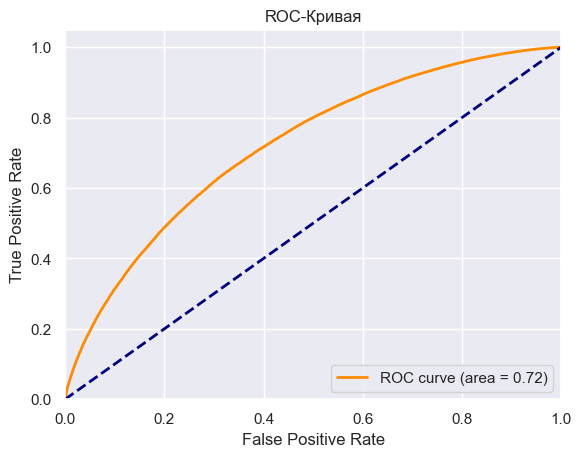

In [63]:
# Рисуем ROC кривую
fpr, tpr, _ = roc_curve(test_target, prediction_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Кривая')
plt.legend(loc="lower right")
plt.show()

In [64]:
# Выводим метрики на экран
print("Лучшие параметры:", CB.best_params_)
print("Gini:", 2 * roc_auc - 1)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)

Лучшие параметры: {'classifier__iterations': 1000, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 6}
Gini: 0.4408738260021412
ROC AUC: 0.7204369130010706
Accuracy: 0.6460265496756299


In [65]:
# Вывод наиболее важных признаков модели
importances = model.named_steps['classifier'].feature_importances_

features_list = list(train_features.columns)

features_results = pd.DataFrame({'features': features_list, 'importance': importances})

features_results = features_results.sort_values('importance', ascending=False).reset_index(drop=True)

features_results.head(50)

,features,importance
0,int_rate,32.163760
1,issue_d,13.853232
2,term,9.628187
3,loan_income_ratio,7.790444
4,home_ownership,4.378028
5,fico_range_low,4.367178
6,mort_acc,3.488911
7,num_tl_op_past_12m,3.083077
8,open_rv_24m,2.863979
9,dti,2.818825


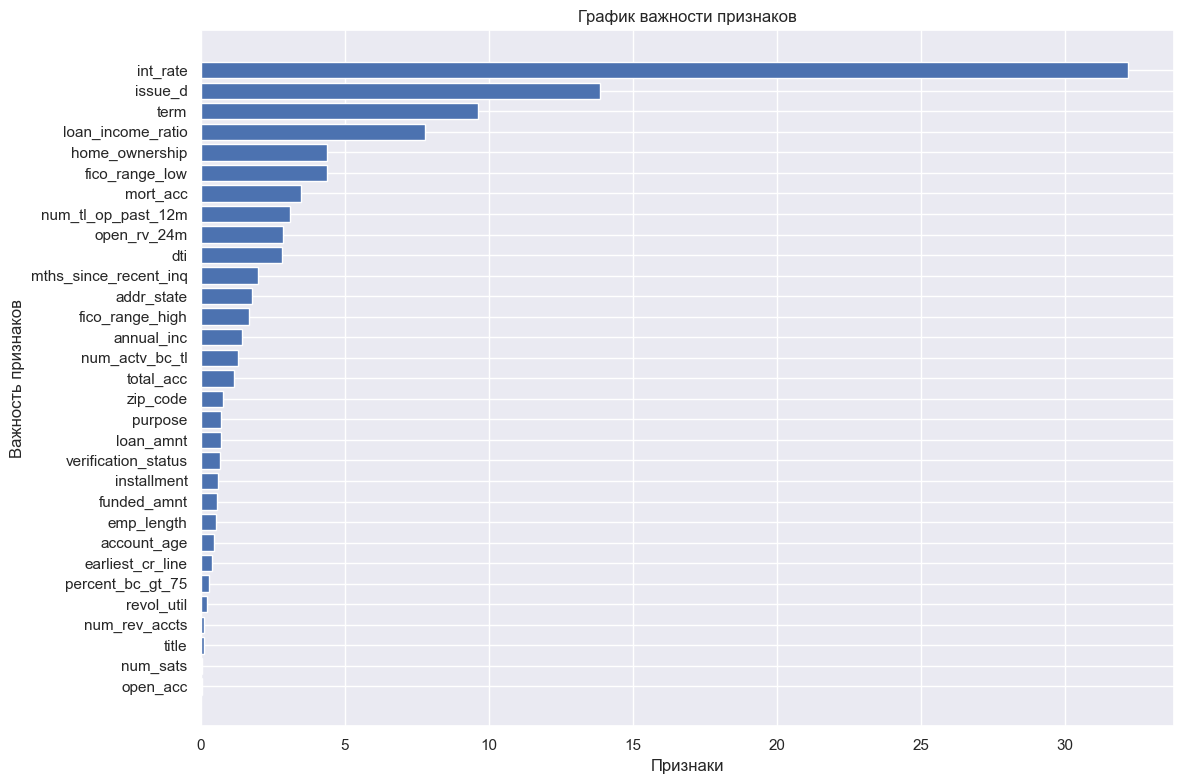

In [66]:
# Построим столбчатый график важности признаков
plt.figure(figsize=(12, 8))

# Выберем топ 50 признакоу
top_features = features_results.head(50).sort_values('importance', ascending=True)

plt.barh(top_features['features'], top_features['importance'])

plt.xlabel('Признаки')
plt.ylabel('Важность признаков')
plt.title('График важности признаков')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Финальная тестовая выборка

In [67]:
# Получаем вероятности принадлежности к классу 1 для тестовой выборки
prediction_proba_test = model.predict_proba(df_test)[:, 1]

In [68]:
output = pd.DataFrame({'index': df_test.index, 'loan_status': prediction_proba_test})

In [69]:
output.head()

,index,loan_status
0,0,0.819901
1,1,0.516827
2,2,0.429775
3,3,0.192866
4,4,0.284578


In [70]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590977 entries, 0 to 590976
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        590977 non-null  int64  
 1   loan_status  590977 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 9.0 MB


In [71]:
output.to_csv('answer.csv', index=False)